# Load in libraries

In [1]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av


def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        Bar = "[{}] {:.0f}% {}".format(ProgressIcon * Block + BarIcon * (BarLength - Block), round(Progress * 100, 0), Status)
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()
    

In [2]:
year = 2019
COLOR_MIZ = [0.9805, 0.5000, 0.4453, 1.0]
COLOR_FSD = sns.color_palette("colorblind",15)[2]
COLOR_WAVE = sns.color_palette("colorblind",15)[3]
COLOR_IAGE = sns.color_palette("colorblind",15)[4]
COLOR_INTERIOR = sns.color_palette("colorblind",15)[0]

# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

#plt.style.use("seaborn")


plt.style.use('default')
plt.style.use(['science','ieee', 'grid'])
sns.set_context("paper")
rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
font_size = 14
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds_mask = xr.open_dataset(filename)
LT = ds_mask['LAT']
LN = ds_mask['LON']
land_mask = ds_mask['tmask'].where(ds_mask['tmask'][:,:] != 1.) 
del ds_mask

# k-means clustering example

In [8]:
# k-means example
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

var1      var2
0  2.438599  1.075810
1  1.855543  1.082692

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df)

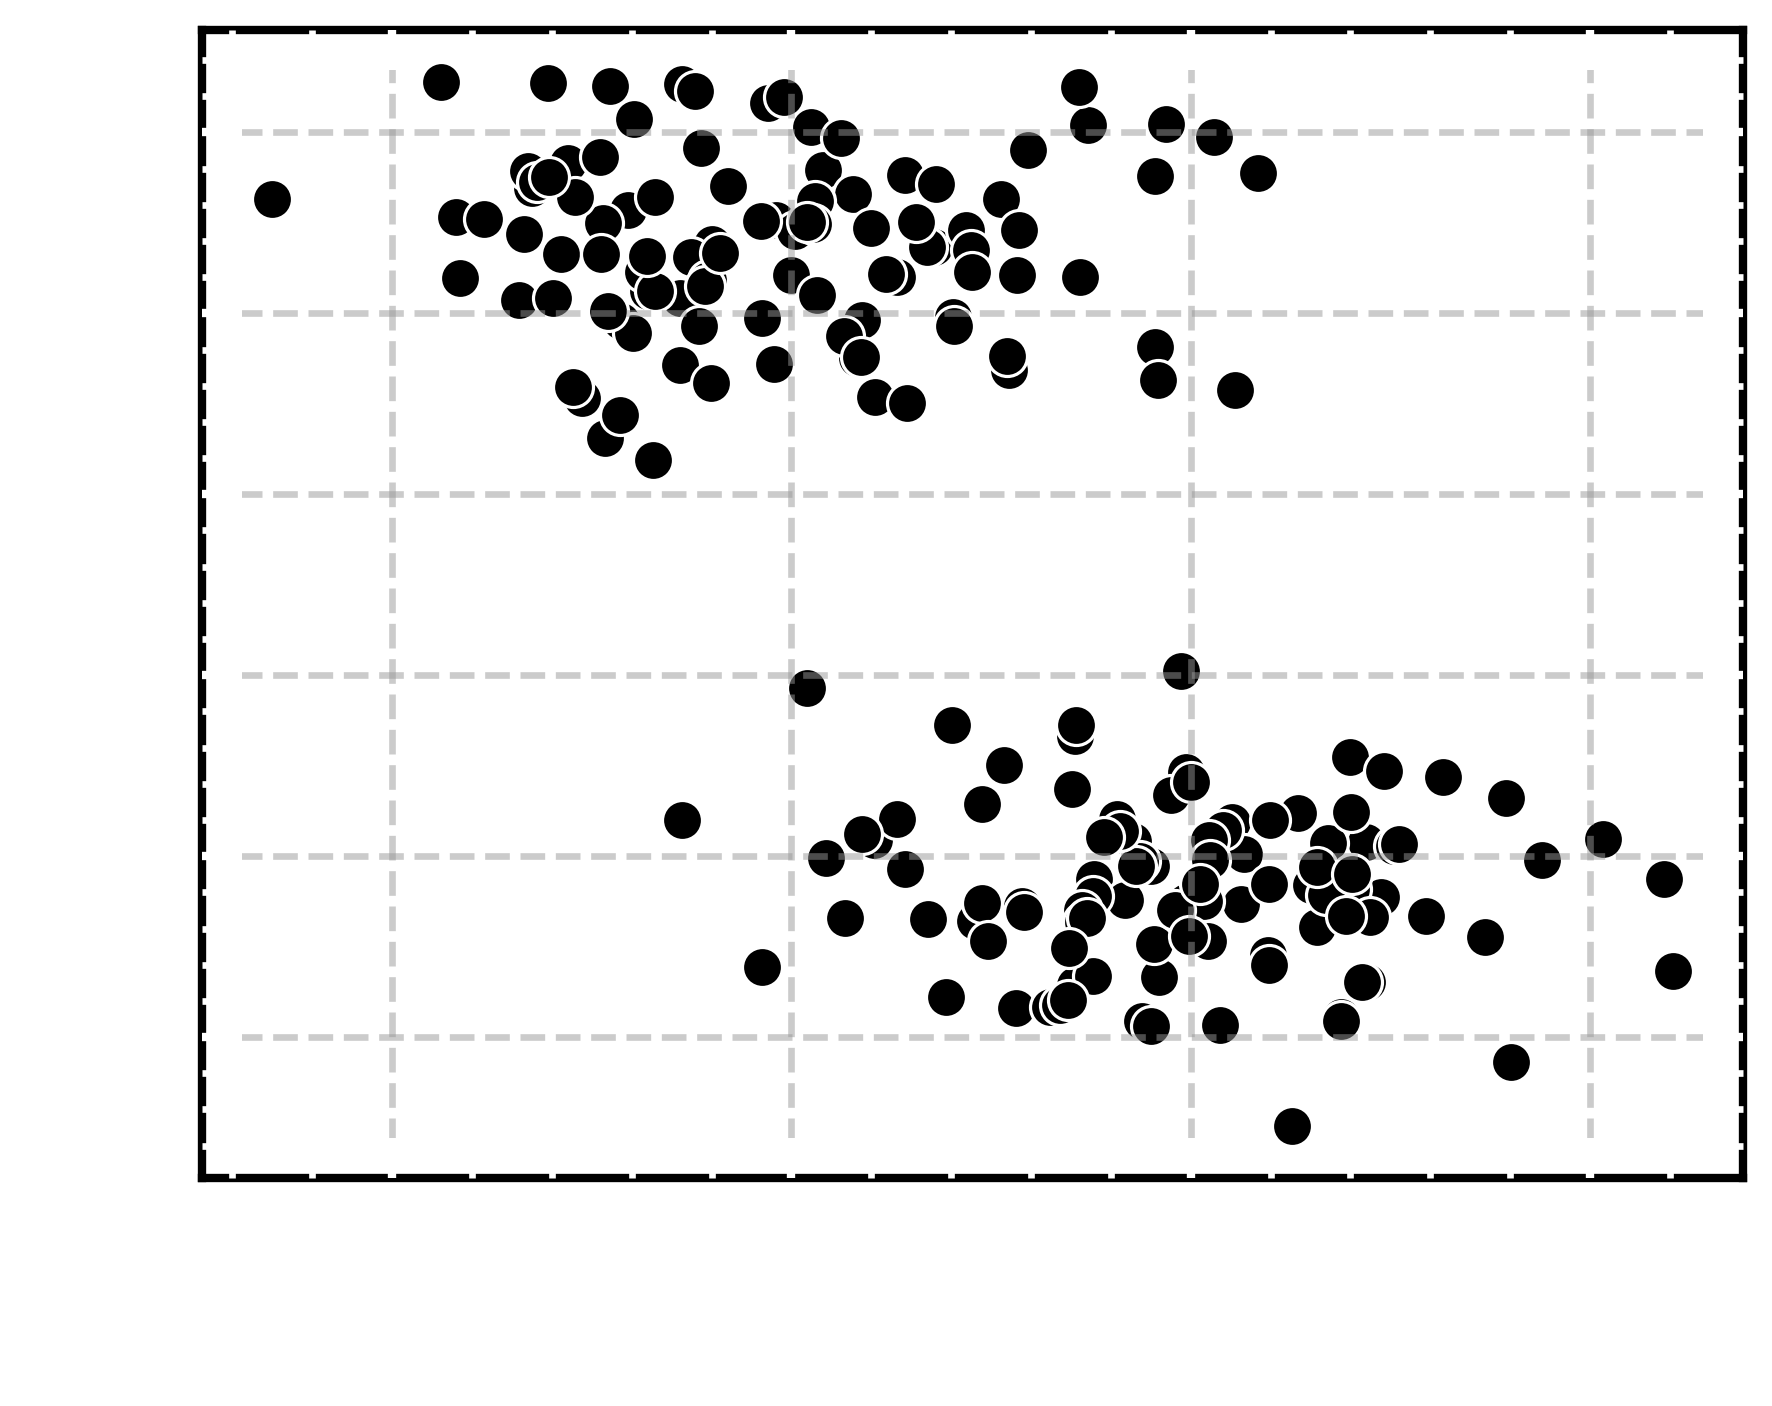

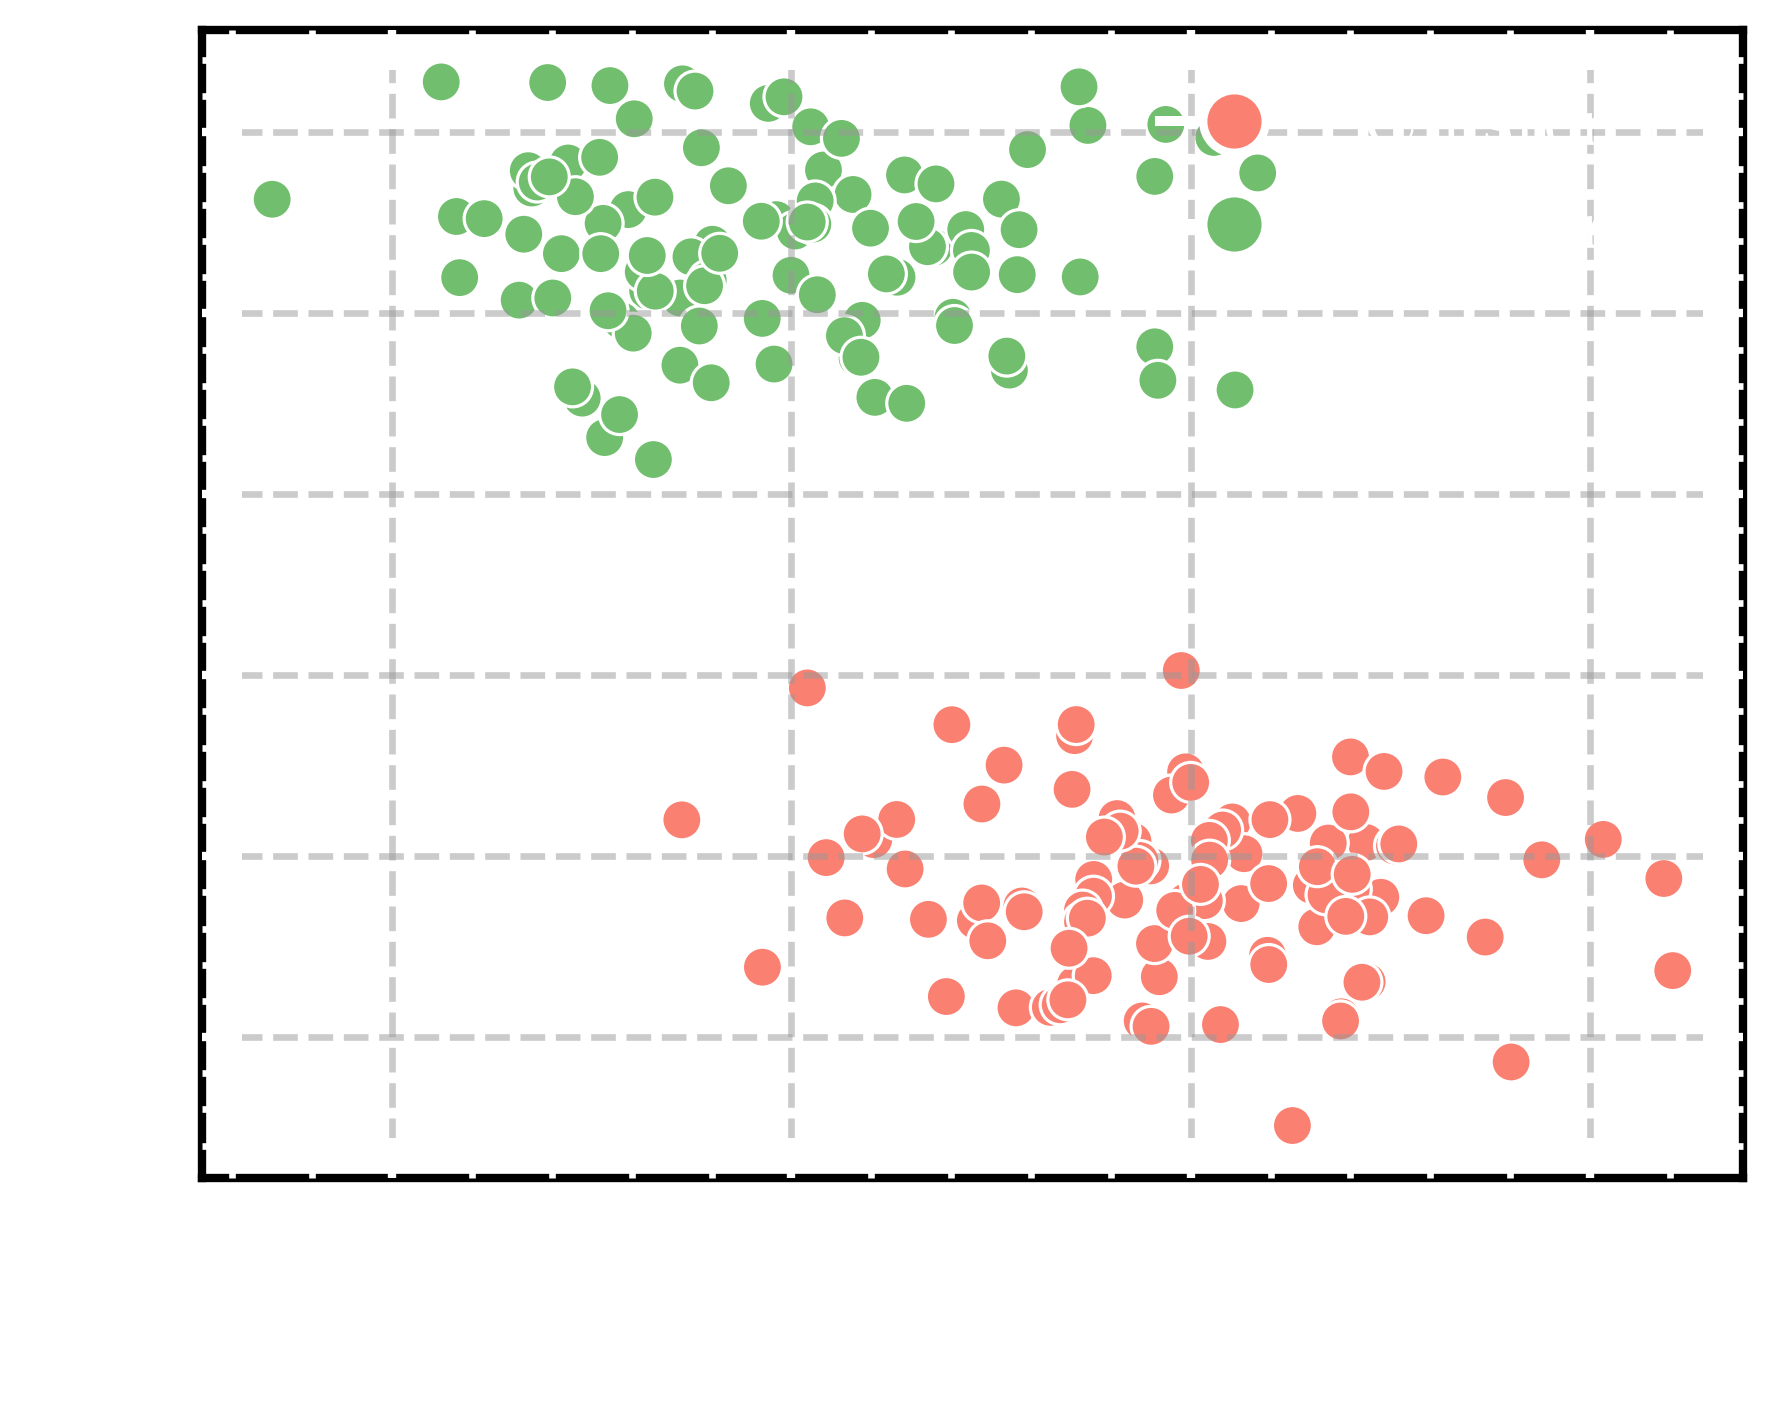

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, figsize=(width/2,height/2))
sns.scatterplot(ax=ax, data=df, x="var1", y="var2")
ax.set(ylabel ='Variable 2', xlabel = 'Variable 1')

plot_dir = '/home/566/nd0349/notebooks/figures/'
plt.savefig(plot_dir + '/' + 'preclustered_example.png', dpi = 900, transparent=True)



fig, ax = plt.subplots(1, 1, figsize=(width/2,height/2))
sns.scatterplot(ax=ax, data=df, x="var1", y="var2", hue=kmeans.labels_, 
                palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0)])
ax.set(ylabel ='Variable 2', xlabel = 'Variable 1')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor=[0.9805, 0.5000, 0.4453, 1.0], markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 2', markerfacecolor=[0.4416, 0.7490, 0.4322, 1.0], markersize=7.5)
                  ]

ax.legend(handles=legend_elements, loc='upper right', edgecolor="white", 
          labelcolor='white', framealpha=0.0)
          
plot_dir = '/home/566/nd0349/notebooks/figures/'
plt.savefig(plot_dir + '/' + 'clustered_example.png', dpi = 900, transparent=True)
plt.show()

In [39]:
# k-means example
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

var1      var2
0 -1.630356  3.357972
1  0.802314  4.381962

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


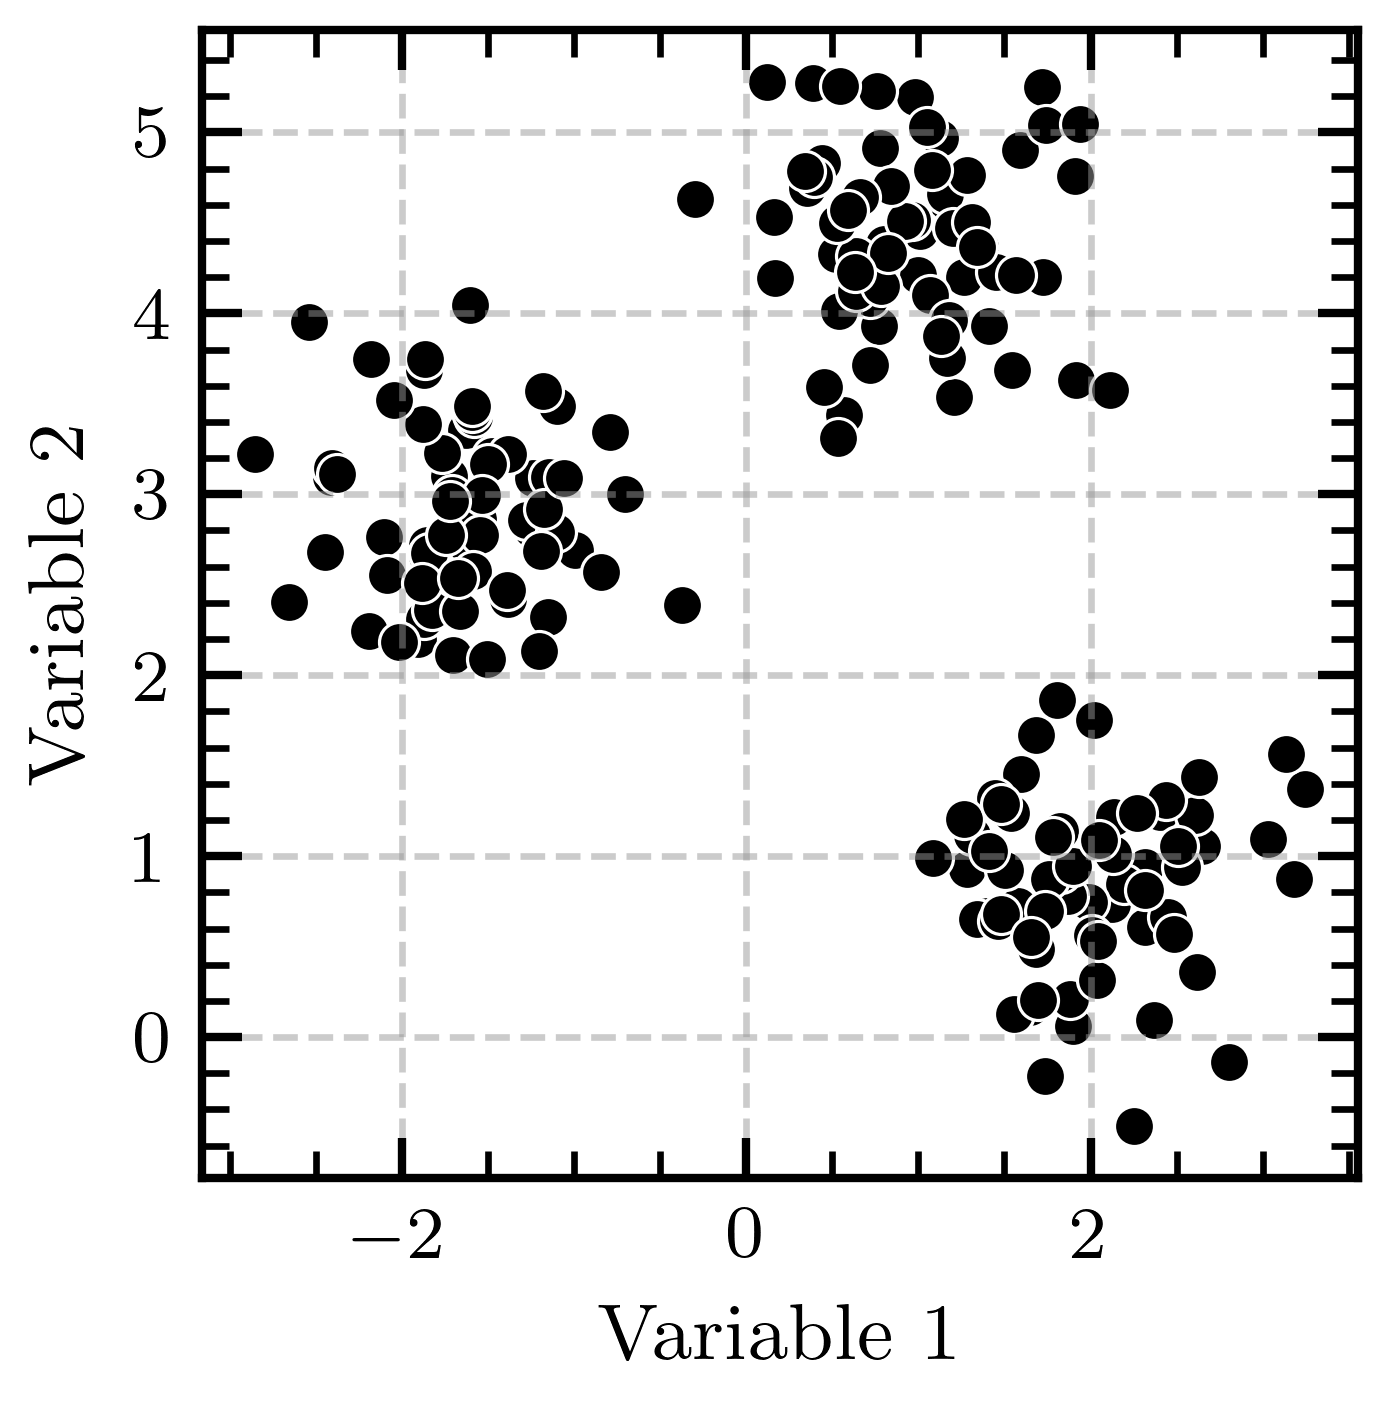

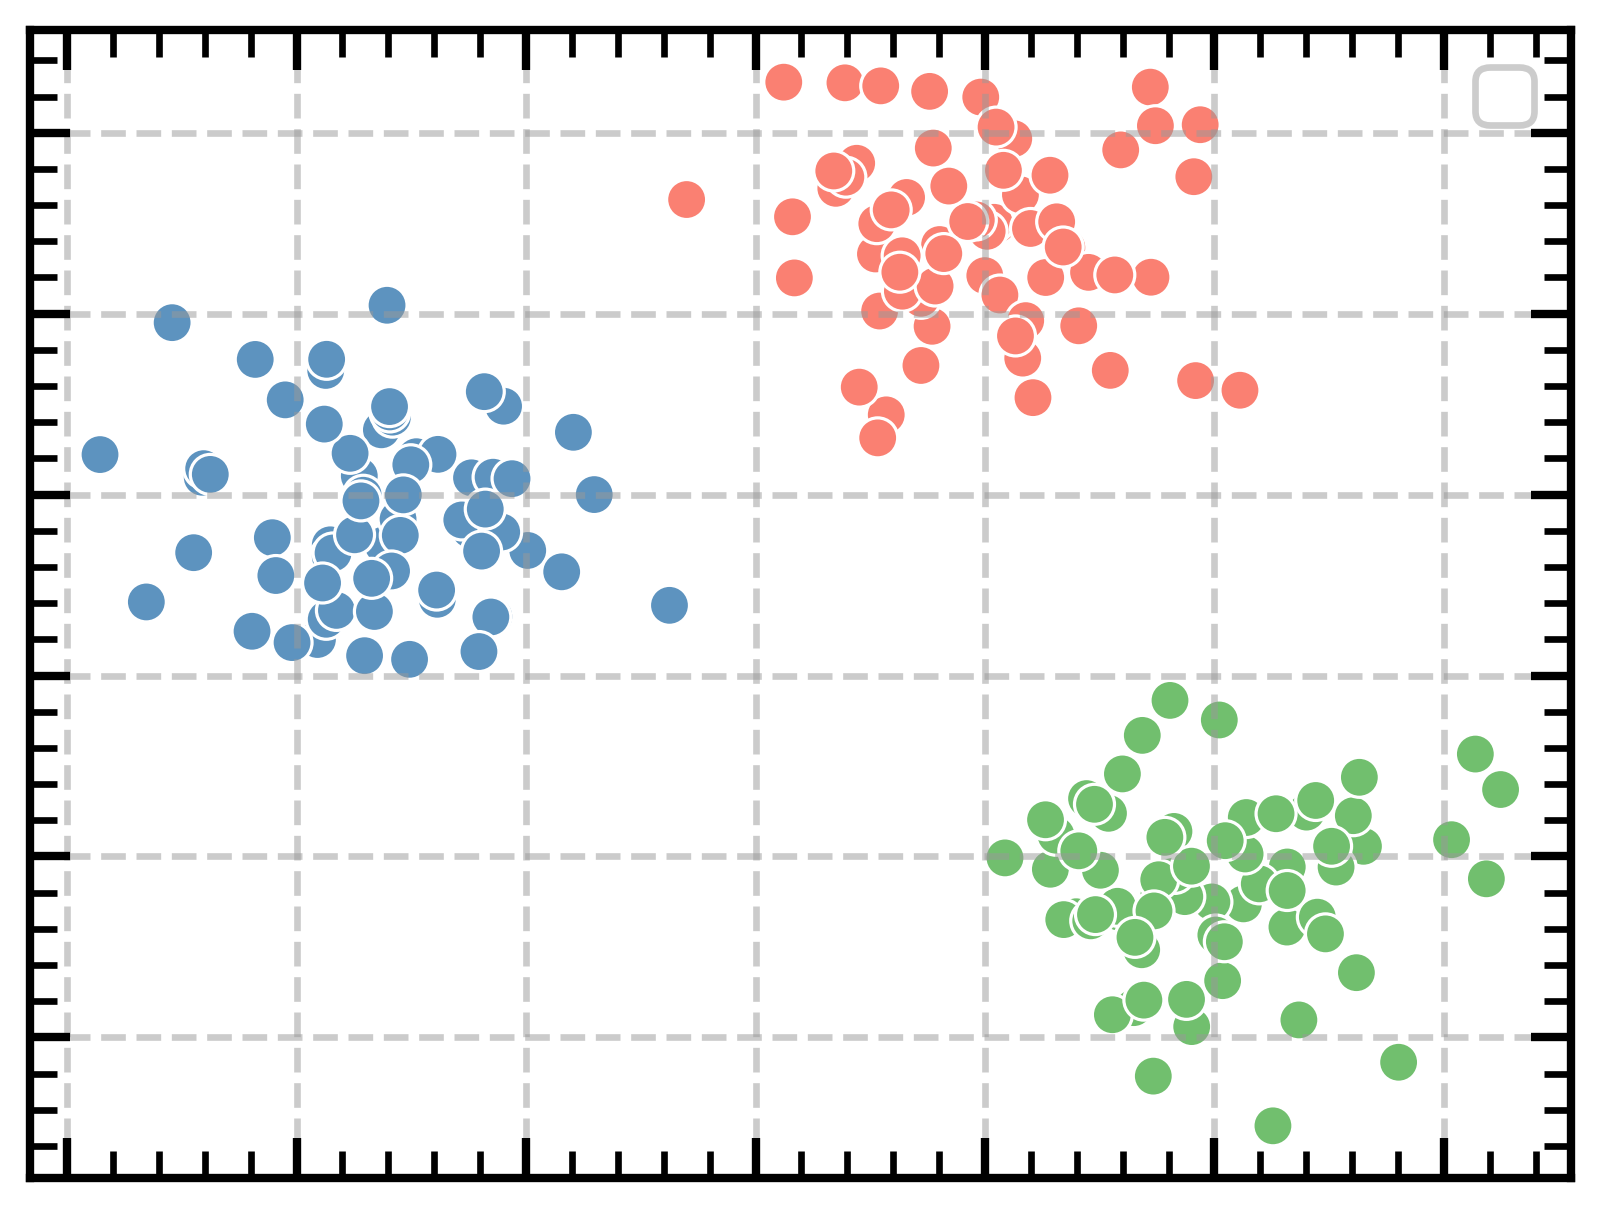

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, figsize=(height/2,height/2))
sns.scatterplot(ax=ax, data=df, x="var1", y="var2")
ax.set(ylabel ='Variable 2', xlabel = 'Variable 1')

plot_dir = '/home/566/nd0349/notebooks/figures/'
plt.savefig(plot_dir + '/' + 'preclustered_example.png', dpi = 900, transparent=True)



fig, ax = plt.subplots(1, 1, figsize=(width/2,height/2))
sns.scatterplot(ax=ax, data=df, x="var1", y="var2", hue=kmeans.labels_, 
                palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
ax.set(ylabel ='Variable 2', xlabel = 'Variable 1')
ax.set(ylabel ='', xlabel = '')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor=[0.9805, 0.5000, 0.4453, 1.0], markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 2', markerfacecolor=[0.4416, 0.7490, 0.4322, 1.0], markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 3', markerfacecolor=[0.3639, 0.5755, 0.748, 1.0], markersize=7.5)
                  ]
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.legend(handles=legend_elements, loc='lower left', edgecolor="black", 
#          labelcolor='black', framealpha=0.0)
ax.legend([])       
plot_dir = '/home/566/nd0349/notebooks/figures/'
plt.savefig(plot_dir + '/' + 'clustered_example_poster.png', dpi = 1000, transparent=True)
plt.show()

# Spider plot

In [35]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import textwrap
plt.rcParams["axes.axisbelow"] = False

class ComplexRadar():
    """
    Create a complex radar chart with different scales for each variable

    Parameters
    ----------
    fig : figure object
        A matplotlib figure object to add the axes on
    variables : list
        A list of variables
    ranges : list
        A list of tuples (min, max) for each variable
    n_ring_levels: int, defaults to 5
        Number of ordinate or ring levels to draw
    show_scales: bool, defaults to True
        Indicates if we the ranges for each variable are plotted

    """
    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True):
        # Calculate angles and create for each variable an axes
        # Consider here the trick with having the first axes element twice (len+1)
        angles = np.arange(0, 360, 360./len(variables))
        # 0.125
        # 0.10999999999999999
        # 0.35227272727272724
        # 0.77
        axes = [fig.add_axes([0.125,0.10999,0.352*0.8,0.87], polar=True, label = "axes{}".format(i)) for i in range(len(variables)+1)]
        
        # Ensure clockwise rotation (first variable at the top N)
        for ax in axes:
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_axisbelow(True)
        
        # Writing the ranges on each axes
        for i, ax in enumerate(axes):

            # Here we do the trick by repeating the first iteration
            j = 0 if (i==0 or i==1) else i-1
            ax.set_ylim(*ranges[j])
            # Set endpoint to True if you like to have values right before the last circle
            grid = np.linspace(*ranges[j], num=n_ring_levels, 
                               endpoint=False)
            # gridlabel = ["{}".format(round(x,1)) for x in grid]
            gridlabel = ['{:.3g}'.format(x) for x in grid]

#            gridlabel = ["{}" for x in grid]
            gridlabel[0] = "" # remove values from the center
            lines, labels = ax.set_rgrids(grid, labels=gridlabel, angle=angles[j], fontsize=8)
            
            ax.set_ylim(*ranges[j])
            ax.spines["polar"].set_visible(False)
            ax.grid(visible=False)
            
            if show_scales == False:
                ax.set_yticklabels([])

        # Set all axes except the first one unvisible
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            
            
        # Setting the attributes
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax1 = axes[1]
        self.plot_counter = 0
        
        # Draw (inner) circles and lines
        self.ax.yaxis.grid()
        self.ax.xaxis.grid()

        # Draw outer circle
        self.ax.spines['polar'].set_visible(True)
        
        
        # ax1 is the duplicate of axes[0] (self.ax)
        # Remove everything from ax1 except the plot itself
        self.ax1.axis('off')
        self.ax1.set_zorder(9)
        
        
        # Create the outer labels for each variable
        l, text = self.ax.set_thetagrids(angles, labels=variables)
        
        # Beautify them
        labels = [t.get_text() for t in self.ax.get_xticklabels()]
        labels = ['\n'.join(textwrap.wrap(l, 10, 
                                          break_long_words=False)) for l in labels]
        self.ax.set_xticklabels(labels)
        
        for t,a in zip(self.ax.get_xticklabels(),angles):
            if a == 0:
                t.set_ha('center')
            elif a > 0 and a < 180:
                t.set_ha('center') # can be left or right
            elif a == 180:
                t.set_ha('center')
            else:
                t.set_ha('center')

        self.ax.tick_params(axis='both', pad=15, zorder=3)


    def _scale_data(self, data, ranges):
        """Scales data[1:] to ranges[0]"""
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        x1, x2 = ranges[0]
        d = data[0]
        sdata = [d]
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        return sdata
        
    def plot(self, data, *args, **kwargs):
        """Plots a line"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        self.plot_counter = self.plot_counter+1
    
    def fill(self, data, *args, **kwargs):
        """Plots an area"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        
    def use_legend(self, *args, **kwargs):
        """Shows a legend"""
        self.ax1.legend(*args, **kwargs)
    
    def set_title(self, title, pad=25, **kwargs):
        """Set a title"""
        self.ax.set_title(title,pad=pad, **kwargs)

In [36]:
# Read in the dataframes
df_all = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/kmeans_'+str(year)+'.csv') for year in tqdm(range(2010,2020))), ignore_index=True)
df_all_raw = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/raw_'+str(year)+'.csv') for year in tqdm(range(2010,2020))), ignore_index=True)
df_all_raw['k'] = df_all['k']

100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


/jobfs/93389961.gadi-pbs/ipykernel_3402572/354990423.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.25)


<Figure size 1987.88x1987.88 with 0 Axes>

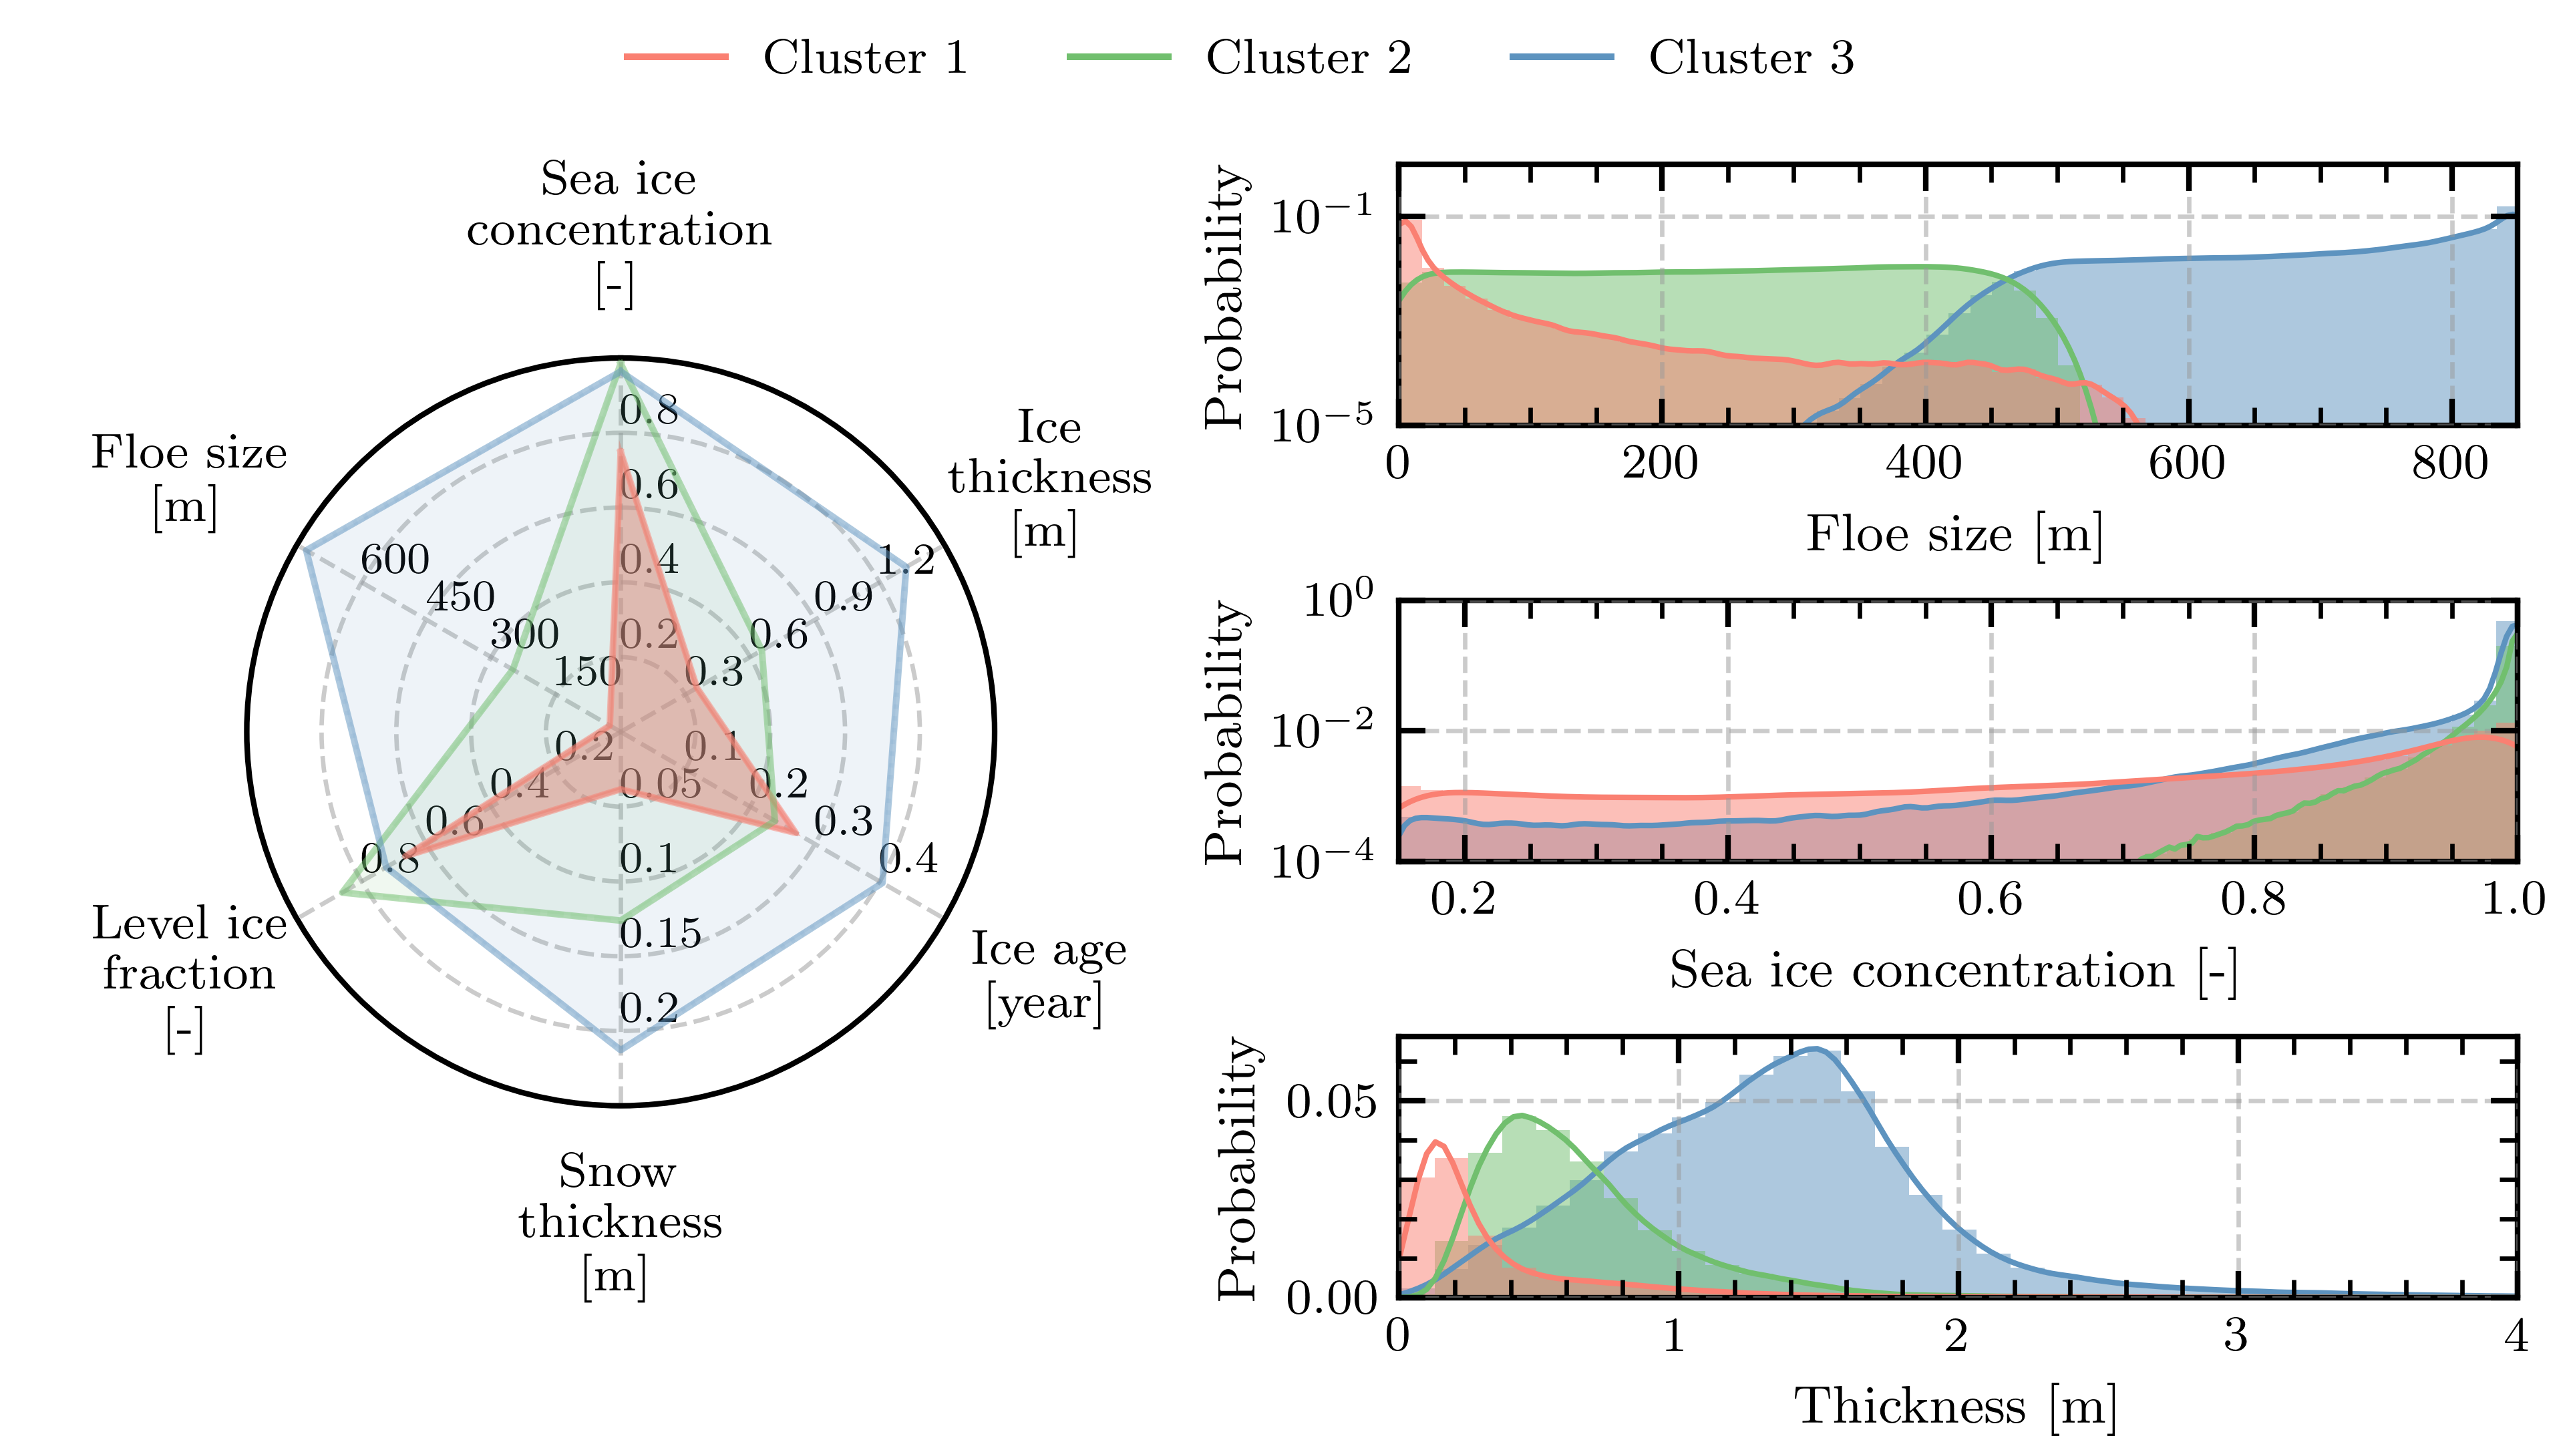

In [38]:
cice_dict = {'aice': 'Sea ice concentration [-]',
             'fsdrad': 'Floe size [m]',
             'hi': 'Ice thickness [m]',
             'hs': 'Snow thickness [m]',
             'iage': 'Ice age [year]',
             'alvl': 'Level ice fraction [-]',
            }

import math

n_bins = 51

df_plot = df_all_raw.sample(n=1000000)
var_idx = [1, 2, 5, 3, 6, 4]

radar_cmap = [(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)]
min_max_per_variable = df_plot.describe().T[['min', 'max']]
min_max_per_variable = min_max_per_variable[1:-3]
min_max_per_variable['min'] = [0, 0, 0, 0, 0, 0] # aice, hi, hs, fsdrad, iage, alvl
# aice, fsdrad, iage, hs, alvl, hi
#min_max_per_variable['min'].apply(lambda x: int(x))
min_max_per_variable['max'] = [1.0, 1.5, 0.5, 0.25, 1.0, 750.0] # aice, hi, hs, fsdrad, iage, alvl
# array([ 0.74869581, 25.2903551 ,  0.27067625,  0.03827766,  0.66506514,
      #  0.35345026])
#min_max_per_variable['max'].apply(lambda x: math.ceil(x))

result = df_plot.groupby('k').mean(numeric_only=True)
result = result.iloc[:,var_idx]
var_tmp = result.columns#[var_idx]
variables = []
variables += (cice_dict[var_tmp[i]] for i in range(0,len(var_tmp)))

ranges = list(min_max_per_variable.itertuples(index=False, name=None))   

fig1 = plt.figure(figsize=(width/2, height*(2/3)))
fig = plt.figure(figsize=(width, height*(2/3)))#, sharex=False)


ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,4)
ax4 = plt.subplot(3,2,6)
axes = [ax1, ax2, ax3, ax4]



radar = ComplexRadar(fig, variables, ranges, show_scales=True)


for k in range(0,3):
    radar.plot(result.iloc[k,:].values, label=f"Cluster {k+1}", color=radar_cmap[k], linestyle='solid', alpha=0.5)
    if k == 0:
        radar.fill(result.iloc[k,:].values, alpha=0.5, color=radar_cmap[k])
    elif k == 1:
        radar.fill(result.iloc[k,:].values, alpha=0.1, color=radar_cmap[k])
    elif k == 2:
        radar.fill(result.iloc[k,:].values, alpha=0.1, color=radar_cmap[k])


#radar.set_title("Radar chart solution with different scales")
#radar.use_legend(loc='upper left', bbox_to_anchor=(0.15, -0.25),ncol=radar.plot_counter)#fancybox=False)
#plt.show() 

sns.histplot(ax=axes[1], data=df_plot, x="fsdrad", hue="k", 
             kde=True, legend=False,
             palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)],
             bins=n_bins, stat='probability',
             line_kws={'lw': 1, 'ls': '-'},
             edgecolor=None, alpha = 0.5,
             cbar_kws=dict(edgecolor="black", linewidth=0))
             #binwidth = 0.33)#, line_kws={'lw': 0.25, 'color': (0.9805, 0.5000, 0.4453, 1.0)},
             #alpha=0.5,color=(0.9805, 0.5000, 0.4453, 1.0))
axes[1].set_yscale('log')
axes[1].set_xlabel('Floe size [m]')
axes[1].set_ylim((0.00001, 1.0))
axes[1].set_xlim((0, 850))

sns.histplot(ax=axes[2], data=df_plot, x="aice", hue="k",
             kde=True, legend=False,
             bins=n_bins, stat='probability',
             line_kws={'lw': 1, 'ls': '-'},
             edgecolor=None, alpha = 0.5,
            palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
axes[2].set_yscale('log')
#axes[1].set_ylabel('')
axes[2].set_xlabel('Sea ice concentration [-]')
axes[2].set_ylim((0.0001, 1.0))
axes[2].set_xlim((0.15, 1))


sns.histplot(ax=axes[3], data=df_plot, x="hi", hue="k", 
             kde=True, legend=False,
             bins=n_bins, stat='probability',
             line_kws={'lw': 1, 'ls': '-'},
             edgecolor=None, alpha = 0.5,
            palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
axes[3].set_yscale('linear')
#axes[2].set_ylabel('')
axes[3].set_xlabel('Thickness [m]')
#axes[2].set_ylim((0.00001, 0.01))
axes[3].set_xlim((0, 4))

fig.tight_layout(pad=0.25)

ax1.set_axis_off()

# trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
# ax1.text(0.0, 1.0, 'a)', transform=axes[0].transAxes + trans,
#        fontsize='medium', verticalalignment='top', fontfamily='serif',
#        bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax2.text(0.0, 1.0, 'b)', transform=axes[1].transAxes + trans,
#        fontsize='medium', verticalalignment='top', fontfamily='serif',
#        bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax3.text(0.0, 1.0, 'c)', transform=axes[2].transAxes + trans,
#        fontsize='medium', verticalalignment='top', fontfamily='serif',
#        bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax4.text(0.0, 1.0, 'd)', transform=axes[3].transAxes + trans,
#        fontsize='medium', verticalalignment='top', fontfamily='serif',
#        bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

#plt.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")
#legend = ax1.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")
#radar.use_legend(loc='upper left', ncol=radar.plot_counter)#fancybox=False)


# Create a legend
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# from data
#plt.plot([1,2,3,4], [10,20,30,40], label='My Data (line)', color='red')
#plt.scatter([2.5], [15], label='My Data (scatter point)', color='b') # plotting single point via scatter
#plt.plot([3.5], [20], label= ' My Data (plot point)', marker='o', markersize=10, 
#         markeredgecolor='k', markerfacecolor='g', linestyle='') # plotting single point via plot with null linestyle

# access legend objects automatically created from data
handles, labels = ax1.get_legend_handles_labels()

# create manual symbols for legend
#patch = mpatches.Patch(color='grey', label='manual patch')   
#line = Line2D([0], [0], label='manual line', color='k')
#point = Line2D([0], [0], label='manual point', marker='s', markersize=10, 
#         markeredgecolor='r', markerfacecolor='k', linestyle='')
line1 = Line2D([0], [0], label='Cluster 1', color=radar_cmap[0])
line2 = Line2D([0], [0], label='Cluster 2', color=radar_cmap[1])
line3 = Line2D([0], [0], label='Cluster 3', color=radar_cmap[2])
                                                             

# add manual symbols to auto legend
handles.extend([line1, line2, line3])
plt.legend(handles=handles, ncol=3, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.05), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)
#[0.125,0.10999,0.352*0.8,0.77*0.8]
#bbox_to_anchor=(1, 1), bbox_transform=fig.transFigure

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'spider_pdf_poster.png', dpi = 900, bbox_inches="tight", transparent=True)
#plt.savefig(savepath+'spider_pdf.pdf')

plt.show()

# Time series gif with map

In [19]:
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation

#fig, ax = plt.subplots()
fig = plt.figure(figsize=[width, height])

ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(2, 1, 2)
ax1 = create_map_axis(ax=ax1, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all")

year = 2019
readfilename='/g/data/ia40/sea-ice-classification/plot_maps.nc'
ds = xr.open_dataset(readfilename)
LN = ds['LON'][:,:]
LT = ds['LAT'][:,:]
step = 2
cluster_data = np.asarray(ds['k'][0:-1:step,:,:])

z = df_miz_ts['1'].values[0:-1:step]
z2 = df_miz_ts['2'].values[0:-1:step]
z3 = df_miz_ts['3'].values[0:-1:step]
t = df_miz_ts['date'].values[0:-1:step]
#t = np.linspace(0, 3, len(z))
#scat = sns.lineplot(x=t[0], y=z[0], color = (0.9805, 0.5000, 0.4453, 1.0),errorbar=None)
#line2 = sns.lineplot(x=t[0], y=z2[0], color = (0.4416, 0.7490, 0.4322, 1.0),errorbar=None)
#sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=z3[0], color = (0.3639, 0.5755, 0.748, 1.0),errorbar=None)

#scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line1 = ax2.plot(t[0], z[0], label=f'Cluster 1', color = (0.9805, 0.5000, 0.4453, 1.0), linestyle='-')[0]
line2 = ax2.plot(t[0], z2[0], label=f'Cluster 2', color = (0.4416, 0.7490, 0.4322, 1.0), linestyle='-')[0]
line3 = ax2.plot(t[0], z3[0], label=f'Cluster 3', color = (0.3639, 0.5755, 0.748, 1.0), linestyle='-')[0]

ax2.set(xlim=[t[0], t[-1]], ylim=[0, 13], xlabel='', ylabel='Area [$10^6$ km$^2$]')
ax2.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black", loc = "upper left")
#ax2.set_xlim((np.round(ax2.get_xlim()[0]+16),np.round(ax2.get_xlim()[-1]-16)))
set_ax_date(ax2, plot_type="clim")




# Make a colormap
cmap = mpl.colors.ListedColormap([(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
cmap.set_bad('white',0.)
cmap.set_over('white',0.)
cmap.set_under('white',0.)

bounds = [44, 51, 53, 56]
tick_labels = ['1', '2', '3']
# define the bins and normalize
bounds = np.linspace(0, 3, 4)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cax = ax1.pcolormesh(LN, LT, cluster_data[0,:,:], # March 1st
                transform=ccrs.PlateCarree(),
                cmap=cmap,
                norm=norm,
                shading='auto')
#fig.colorbar(cax)
#ax4.set_ylim((0,14))
#ax.axhline(y = 0.0, color = 'gray', linestyle = '-',alpha=1.0)
#plt.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")


def update(frame):

    cax.set_array(cluster_data[frame,:,:].flatten())
    sys.stdout.flush()
    print(frame)
    fig.suptitle(str(t[frame])[0:10], fontsize=15, x=0.5, y = 0.97)
    # p = ax1.pcolormesh(LN, LT, ds['k'][frame,:,:], # March 1st
    #             transform=ccrs.PlateCarree(),
    #             cmap=cmap,
    #             norm=norm,
    #             shading='auto')

    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
#    data = np.stack([x, y]).T
#    scat.set_offsets(data)
    # update the line plot:
    line1.set_xdata(t[:frame])
    line1.set_ydata(z[:frame])
    
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    
    line3.set_xdata(t[:frame])
    line3.set_ydata(z3[:frame])
    return (line1, line2, line3)

#ani = animation.FuncAnimation(fig=fig, func=update, frames=len(z), interval=((20*1000)/len(z))) # Should be 10 seconds
#ani.save(filename="/home/566/nd0349/notebooks/timseries_cluster.gif", writer="imagemagick")
#plt.show()
# ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
# video = ani.to_html5_video()
# html = display.HTML(video)
# display.display(html)

# plt.show()



NameError: name 'df_miz_ts' is not defined

Error in callback <function flush_figures at 0x14c586816430> (for post_execute):



KeyboardInterrupt



In [7]:
# Initialise arrays
n_days = 365
year_range = range(2019,2020)
SIE_MIZ = np.empty((len(year_range), n_days))
SIE_YOUNG = np.empty((len(year_range), n_days))
SIE_OLD = np.empty((len(year_range), n_days))
SIE_total = np.empty((len(year_range), n_days))

day_vec = range(0,n_days,1)

# Circumpolar for each day
for i,year in tqdm(enumerate(year_range), total = len(year_range), desc = "Reading in SIE data"):
    filename = '/g/data/ia40/sea-ice-classification/kmean_'+str(year)+'.nc'
    ds = xr.open_dataset(filename)
    for day_idx in day_vec:
        # Calculate MIZ area
        SIE_MIZ[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 0).sum()
        SIE_YOUNG[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 1).sum()
        SIE_OLD[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 2).sum()
        #SIE_total[i,day_idx] = np.multiply(ds['tarea'][:,:].data, ds['aice'][day_idx,:,:].data > 0.15).sum()*(1/len(year_range))
del ds

df_miz_ts = pd.DataFrame({"date": pd.date_range(start="2019-01-01",end="2019-12-31"),
                          "1": SIE_MIZ.mean(axis=0)*(0.000000000001),
                          "2": SIE_YOUNG.mean(axis=0)*(0.000000000001),
                          "3": SIE_OLD.mean(axis=0)*(0.000000000001)})

Reading in SIE data: 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]


### Multiple maps

In [25]:
# Plotting
import scienceplots
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.colors as colors
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
import matplotlib.dates as mdates
import plotly.express as px
from matplotlib.ticker import NullFormatter
from matplotlib import rc
import seaborn as sns
import matplotlib.transforms as mtransforms
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib.transforms as mtransforms
import seaborn as sns
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import cartopy.feature as cfea
import numpy as np


def create_map_axis_poster(ax, LN, LT, land_mask, draw_labels="off", textcolor = 'black'):
    COLOR_LAND = (0.7, 0.7, 0.7)
#    fig.subplots_adjust(bottom=0.05, top=0.95,
#                    left=0.04, right=0.95, wspace=0.02)
    # Limit the map to -60 degrees latitude and below.
    coord_lims = [-180, 180, -90, -50]
    ax.set_extent(coord_lims, ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=0.25, color='gray', alpha=0.5, linestyle='--', zorder=4)
    gl.top_labels = False
    gl.bottom_labels = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-120, -60, 0, 60, 120])
    if draw_labels == "right": # right
        gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.0, linestyle='--')
        gl2.xlocator = mticker.FixedLocator([60, 120, 0])
        gl2.ylocator = mticker.FixedLocator([0])
    elif draw_labels == "left": # left
        gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.0, linestyle='--')
        gl2.xlocator = mticker.FixedLocator([-60, -120, 0])
        gl2.ylocator = mticker.FixedLocator([0])
    elif draw_labels == "middle":
        gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.0, linestyle='--')
        gl2.xlocator = mticker.FixedLocator([0])
        gl2.ylocator = mticker.FixedLocator([0])
    elif draw_labels == "all":
        gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.0, linestyle='--')
        gl2.xlocator = mticker.FixedLocator([-60, -120, 0, 60, 120])
        gl2.ylocator = mticker.FixedLocator([0])
        
#    gl.right_labels = False
#    gl.left_labels = False
    
    gl.ylocator = mticker.FixedLocator([-80, -70, -60])
    gl2.ylocator = mticker.FixedLocator([0])
    #gl.ylocator = LatitudeLocator()
    gl2.xformatter = LongitudeFormatter()
    gl2.yformatter = LatitudeFormatter()
    gl2.xlabel_style = {'color': textcolor, 'weight': 'bold', 'size': 8, 
                      }
#    gl.ylabel_style = {'size': 8}
#    gl2.ylabel_style = {'size': 8}

#    ax.add_feature(cfeature.LAND,color='gray')
#    ax.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    
#    cmap_mask = mpl.colors.ListedColormap([COLOR_LAND])
    # ax.pcolormesh(LN, LT, land_mask,
    #         transform=ccrs.PlateCarree(),
    #         cmap=cmap_mask,
    #         alpha = 1.0,
    #         shading='auto')
    land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                        edgecolor='black', facecolor=COLOR_LAND, linewidth=0.5)
    ax.add_feature(land_50m)
    
    ax.plot([180, 180], [-90, -84.6],
                     zorder=3, color=COLOR_LAND,
                     linewidth=0.75,
                     transform=ccrs.PlateCarree())

    
    return ax

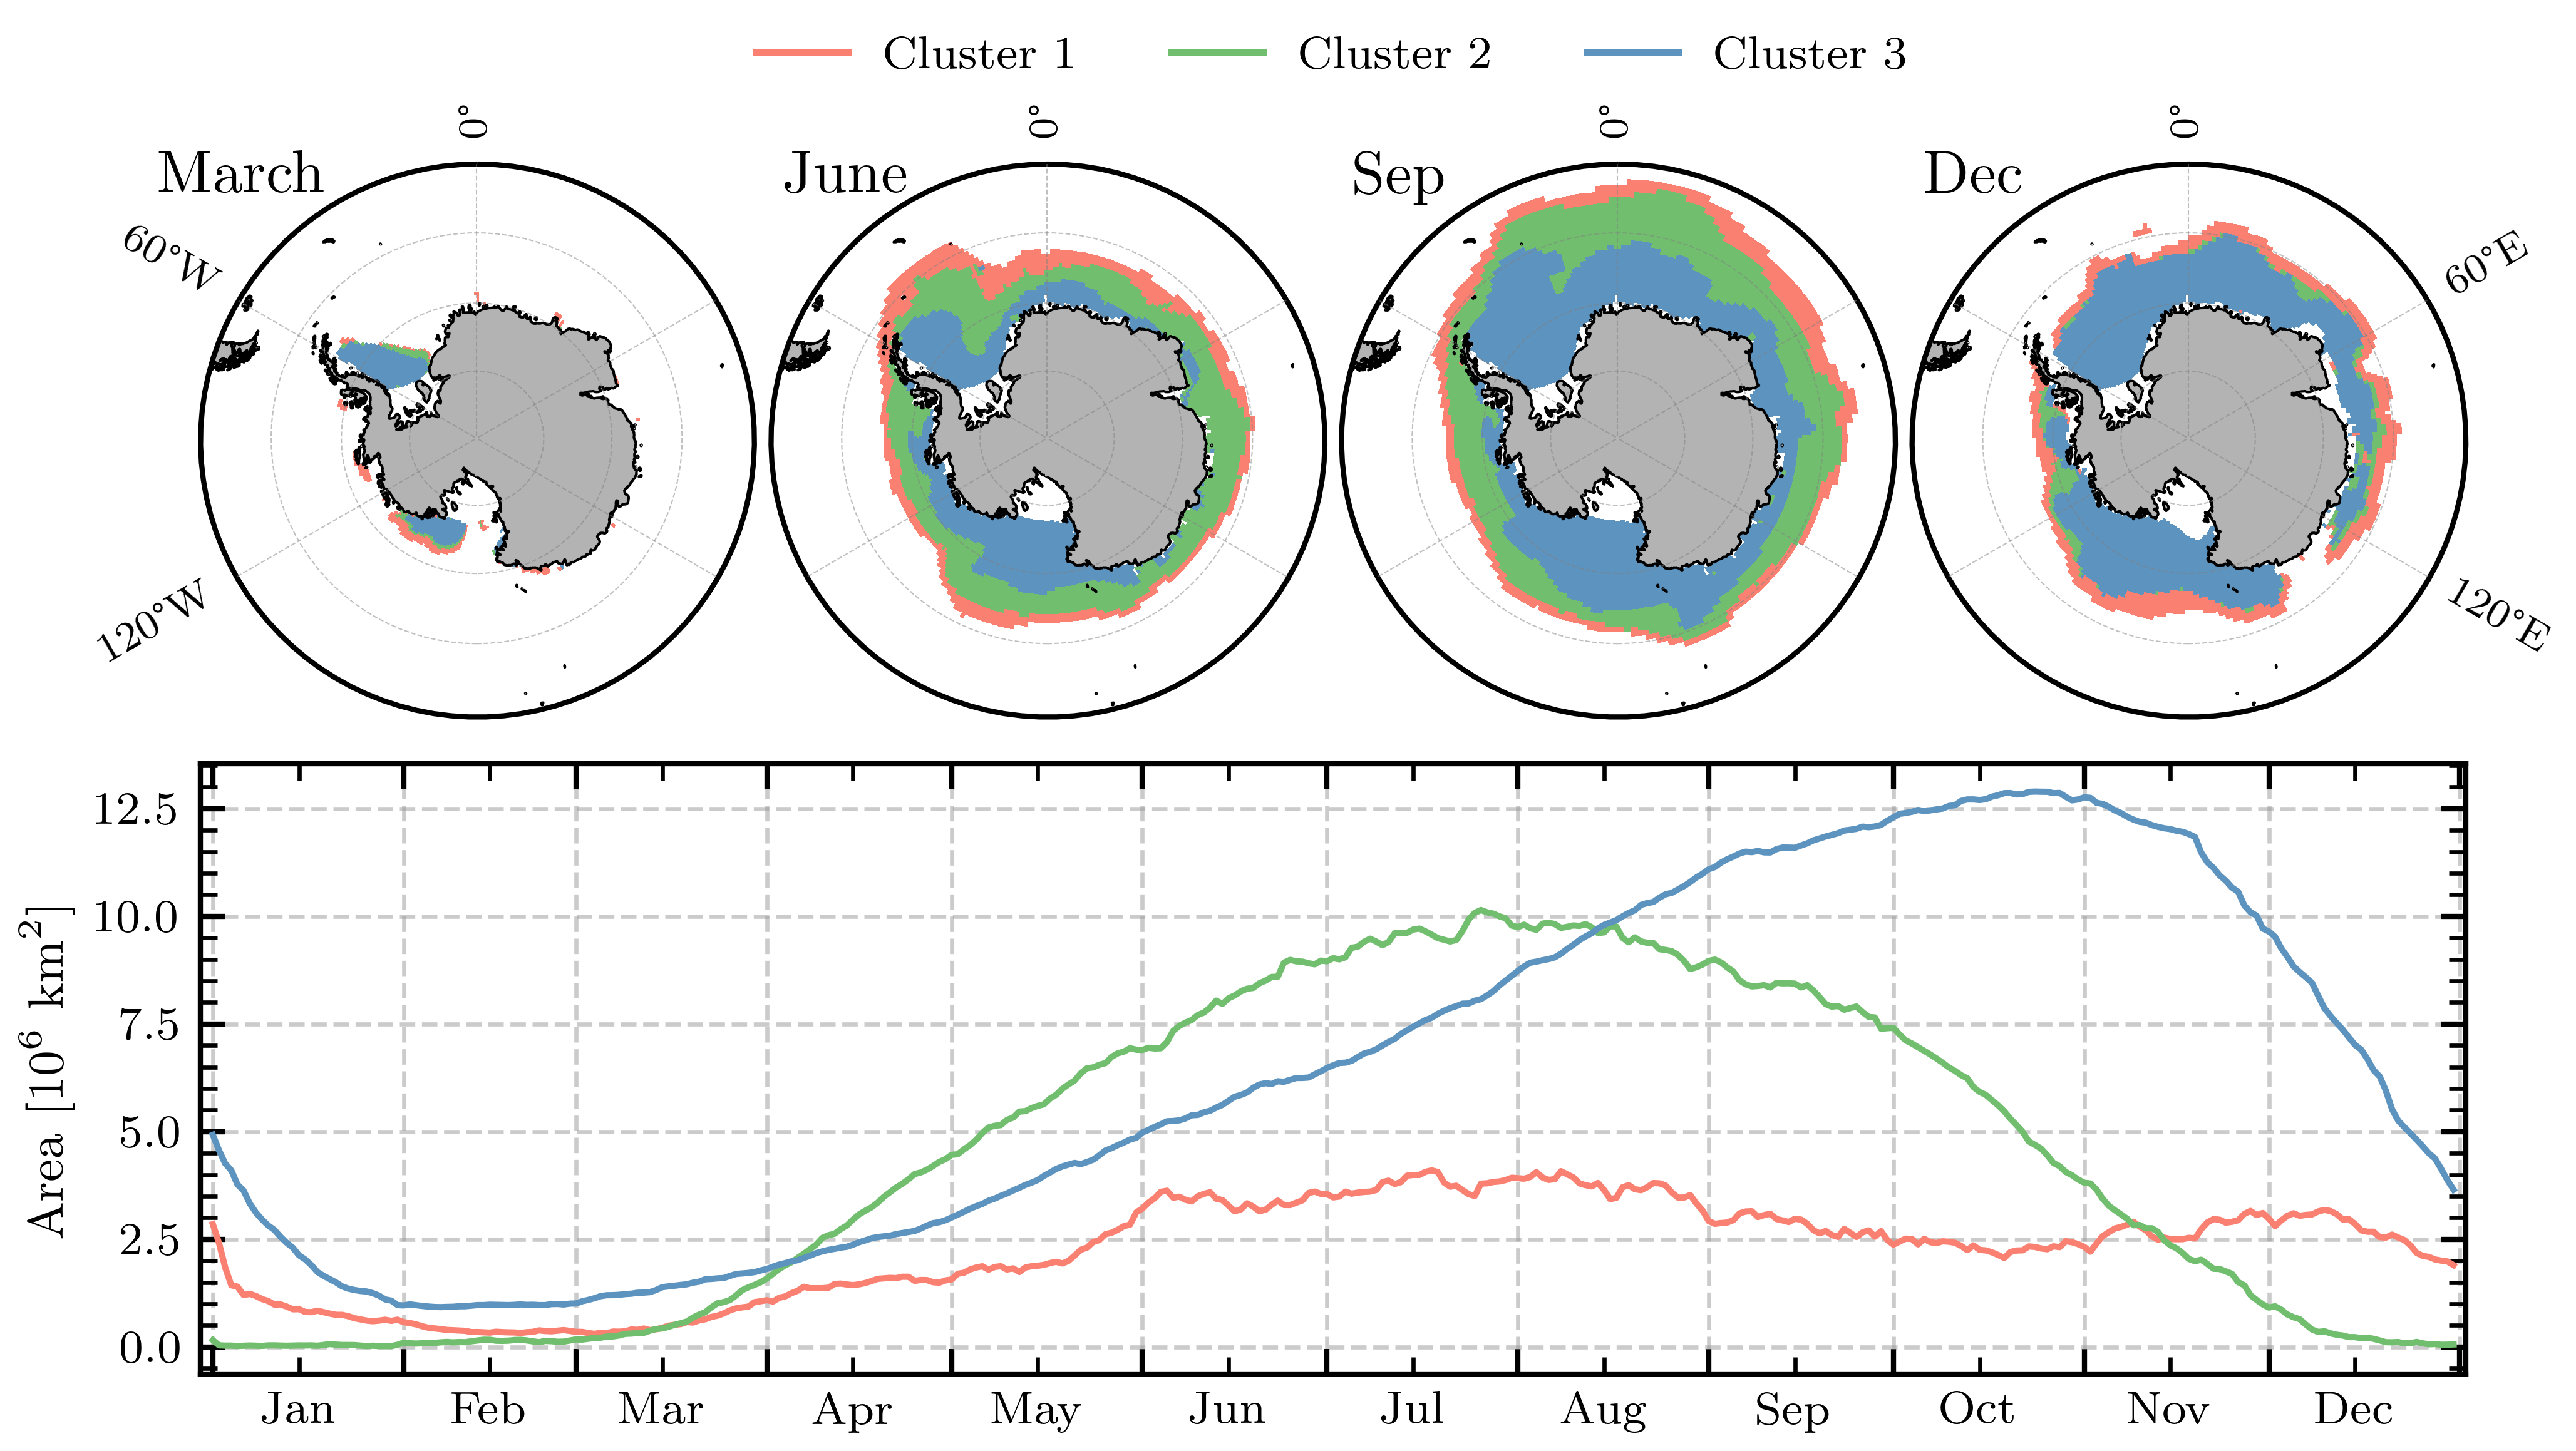

In [34]:
# -----
#readfilename='/g/data/ia40/sea-ice-classification/kmean_2019.nc'
#ds = xr.open_dataset(readfilename)
#LT = ds['LAT']
#LN = ds['LON']
readfilename='/g/data/ia40/sea-ice-classification/plot_maps.nc'
ds = xr.open_dataset(readfilename)

fig = plt.figure(figsize=[width, height])



ax1 = fig.add_subplot(3, 4, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(3, 4, 2, projection=ccrs.SouthPolarStereo(), sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(3, 4, 3, projection=ccrs.SouthPolarStereo(), sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(3, 4, 4, projection=ccrs.SouthPolarStereo(), sharex=ax1, sharey=ax1)
ax5 = fig.add_subplot(3, 1, 2)

ax1 = create_map_axis_poster(ax=ax1, LN=LN, LT=LT, land_mask=land_mask, draw_labels="left")
ax2 = create_map_axis_poster(ax=ax2, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle")
ax3 = create_map_axis_poster(ax=ax3, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle")
ax4 = create_map_axis_poster(ax=ax4, LN=LN, LT=LT, land_mask=land_mask, draw_labels="right")



# Make a colormap
cmap = mpl.colors.ListedColormap([(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])

bounds = [44, 51, 53, 56]
tick_labels = ['1', '2', '3']
# define the bins and normalize
bounds = np.linspace(0, 3, 4)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

p = ax1.pcolormesh(LN, LT, ds['k'][31+28,:,:], # March 1st
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            shading='auto')

p = ax2.pcolormesh(LN, LT, ds['k'][31+28+31+30+31,:,:], # June 1st
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            shading='auto')

p = ax3.pcolormesh(LN, LT, ds['k'][31+28+31+30+31+30+30+31,:,:], # September 1st
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            shading='auto')

p = ax4.pcolormesh(LN, LT, ds['k'][31+28+31+30+31+30+30+31+30+31+30,:,:], # December 1st
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            shading='auto')

#fig.subplots_adjust(bottom=0.05, top=0.95,
               # left=0.04, right=0.95, wspace=0.03, hspace=0.03)
fig.subplots_adjust(bottom=0.0, top=1.0,
               left=0.04, right=0.95, wspace=0.03, hspace=0.03)

sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['1'], color = (0.9805, 0.5000, 0.4453, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['2'], color = (0.4416, 0.7490, 0.4322, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['3'], color = (0.3639, 0.5755, 0.748, 1.0),errorbar=None)

ax5.set_xlim((np.round(ax5.get_xlim()[0]+16),np.round(ax5.get_xlim()[-1]-16)))
ax5.set_ylabel('Area [$10^6$ km$^2$]')
ax5.set_xlabel('')
#ax4.set_ylim((0,14))
#ax.axhline(y = 0.0, color = 'gray', linestyle = '-',alpha=1.0)

set_ax_date(ax5, plot_type="clim")
plt.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")
sns.move_legend(ax5, "upper center", bbox_to_anchor=(.5, 2.26), ncol=3, title=None, frameon=True, 
                fancybox=False, edgecolor='black', framealpha=0.0)

trans = mtransforms.ScaledTranslation(2.5/72, 2.5/72, fig.dpi_scale_trans)
ax1.text(-0.1, 1.0, 'March', transform=ax1.transAxes + trans, 
       fontsize='small', verticalalignment='top', fontfamily='serif',
       bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax2.text(0.0, 1.0, 'June', transform=ax2.transAxes + trans, 
       fontsize='small', verticalalignment='top', fontfamily='serif',
       bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax3.text(0.0, 1.0, 'Sep', transform=ax3.transAxes + trans, 
       fontsize='small', verticalalignment='top', fontfamily='serif',
       bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax4.text(0.0, 1.0, 'Dec', transform=ax4.transAxes + trans, 
       fontsize='small', verticalalignment='top', fontfamily='serif',
       bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
# ax5.text(0.0, 1.0, 'e)', transform=ax5.transAxes + trans,
#        fontsize='medium', verticalalignment='top', fontfamily='serif',
#        bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'SIE_ts_maps_poster.png', dpi = 1000, bbox_inches='tight', transparent=True) 
#plt.savefig(savepath+'SIE_ts_maps.pdf', bbox_inches='tight')  
plt.show()

### Animated time series

Plotting frames: 100%|█████████▉| 364/365 [24:07<00:03,  3.98s/it]


IndexError: index 365 is out of bounds for axis 0 with size 365

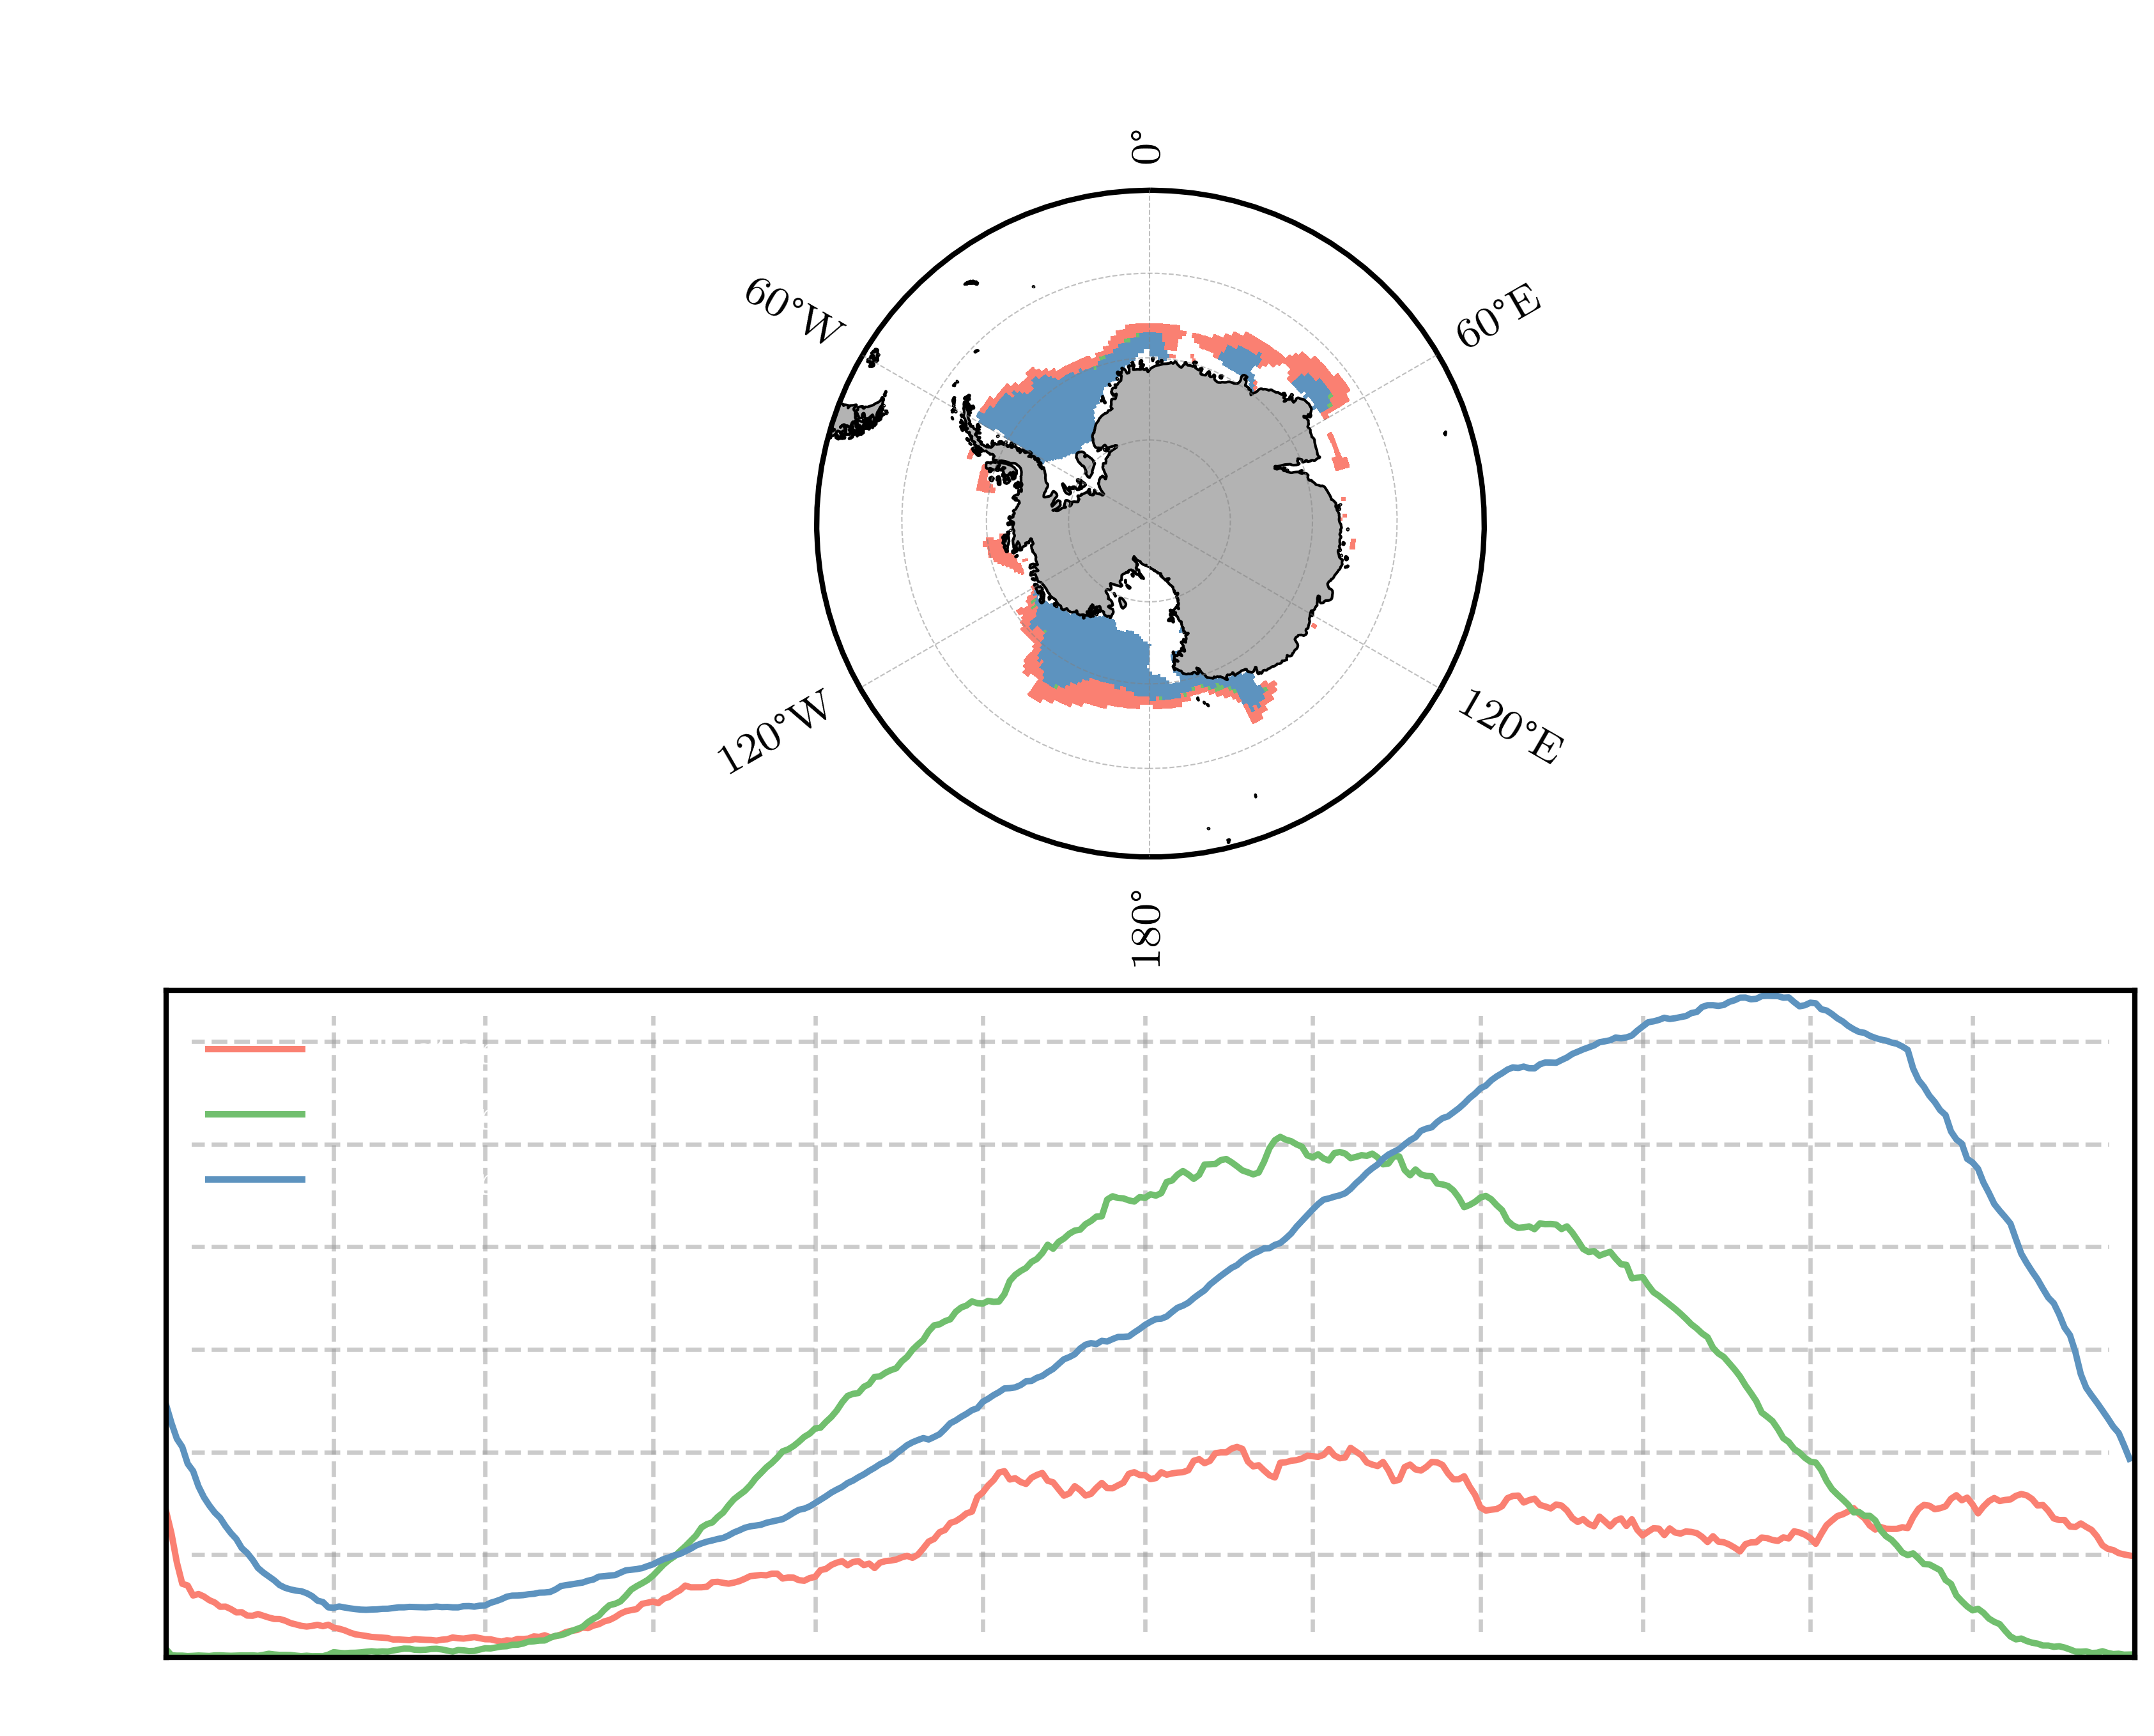

In [30]:
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation

#fig, ax = plt.subplots()
fig = plt.figure(figsize=[width, height])

ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(2, 1, 2)
ax1 = create_map_axis(ax=ax1, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all")

year = 2019
readfilename='/g/data/ia40/sea-ice-classification/plot_maps.nc'
ds = xr.open_dataset(readfilename)
LN = ds['LON'][:,:]
LT = ds['LAT'][:,:]
step = 1
cluster_data = np.asarray(ds['k'][0::step,:,:])

z = df_miz_ts['1'].values[0::step]
z2 = df_miz_ts['2'].values[0::step]
z3 = df_miz_ts['3'].values[0::step]
t = df_miz_ts['date'].values[0::step]

line1 = ax2.plot(t[0], z[0], label=f'Cluster 1', color = (0.9805, 0.5000, 0.4453, 1.0), linestyle='-')[0]
line2 = ax2.plot(t[0], z2[0], label=f'Cluster 2', color = (0.4416, 0.7490, 0.4322, 1.0), linestyle='-')[0]
line3 = ax2.plot(t[0], z3[0], label=f'Cluster 3', color = (0.3639, 0.5755, 0.748, 1.0), linestyle='-')[0]

ax2.set(xlim=[t[0], t[-1]], ylim=[0, 13], xlabel='', ylabel='Area [$10^6$ km$^2$]')
ax2.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="white", loc = "upper left", labelcolor='white', framealpha=0.0)
#ax2.set_xlim((np.round(ax2.get_xlim()[0]+16),np.round(ax2.get_xlim()[-1]-16)))
set_ax_date(ax2, plot_type="clim")

#plt.figure(facecolor=[28/256, 28/256, 28/256])


# Make a colormap
cmap = mpl.colors.ListedColormap([(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
cmap.set_bad('white',0.)
cmap.set_over('white',0.)
cmap.set_under('white',0.)

bounds = [44, 51, 53, 56]
tick_labels = ['1', '2', '3']
# define the bins and normalize
bounds = np.linspace(0, 3, 4)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cax = ax1.pcolormesh(LN, LT, cluster_data[0,:,:], # March 1st
                transform=ccrs.PlateCarree(),
                cmap=cmap,
                norm=norm,
                shading='auto')

savepath = '/home/566/nd0349/notebooks/figures/gif'

for frame, z_val in tqdm(enumerate(z), total = len(z), desc='Plotting frames'):
    frame = frame + 1
    cax.set_array(cluster_data[frame,:,:].flatten())
    sys.stdout.flush()
#    print(frame)
    fig.suptitle(str(t[frame])[0:10], fontsize=15, x=0.5, y = 0.97)
    # p = ax1.pcolormesh(LN, LT, ds['k'][frame,:,:], # March 1st
    #             transform=ccrs.PlateCarree(),
    #             cmap=cmap,
    #             norm=norm,
    #             shading='auto')

    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
#    data = np.stack([x, y]).T
#    scat.set_offsets(data)
    # update the line plot:
    line1.set_xdata(t[:frame])
    line1.set_ydata(z[:frame])
    
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    
    line3.set_xdata(t[:frame])
    line3.set_ydata(z3[:frame])
    
    
    plt.savefig(savepath + '/' + 'ts_map' + '-' + str(t[frame])[0:10]+'.png', dpi = 450, transparent=True)
   # plt.close(fig)


In [31]:
from PIL import Image
frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
year = 2019
dframe = 1
gifname = frame_folder + '/' + 'ts_map' + '-'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+'ts_map'+"-"+str(year)+"*.png")[120::15])
frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]
frame_one = frames[0]
frame_one.save(gifname + str(year) + ".gif", format="GIF", append_images=frames,
           save_all=True, duration=120, loop=0, transparency=0, disposal=2)

In [4]:
from typing import Tuple, List, Union
from collections import defaultdict
from random import randrange
from itertools import chain

from PIL.Image import Image
import PIL.Image


class TransparentAnimatedGifConverter(object):
    _PALETTE_SLOTSET = set(range(256))

    def __init__(self, img_rgba: Image, alpha_threshold: int = 0):
        self._img_rgba = img_rgba
        self._alpha_threshold = alpha_threshold

    def _process_pixels(self):
        """Set the transparent pixels to the color 0."""
        self._transparent_pixels = set(
            idx for idx, alpha in enumerate(
                self._img_rgba.getchannel(channel='A').getdata())
            if alpha <= self._alpha_threshold)

    def _set_parsed_palette(self):
        """Parse the RGB palette color `tuple`s from the palette."""
        palette = self._img_p.getpalette()
        self._img_p_used_palette_idxs = set(
            idx for pal_idx, idx in enumerate(self._img_p_data)
            if pal_idx not in self._transparent_pixels)
        self._img_p_parsedpalette = dict(
            (idx, tuple(palette[idx * 3:idx * 3 + 3]))
            for idx in self._img_p_used_palette_idxs)

    def _get_similar_color_idx(self):
        """Return a palette index with the closest similar color."""
        old_color = self._img_p_parsedpalette[0]
        dict_distance = defaultdict(list)
        for idx in range(1, 256):
            color_item = self._img_p_parsedpalette[idx]
            if color_item == old_color:
                return idx
            distance = sum((
                abs(old_color[0] - color_item[0]),  # Red
                abs(old_color[1] - color_item[1]),  # Green
                abs(old_color[2] - color_item[2])))  # Blue
            dict_distance[distance].append(idx)
        return dict_distance[sorted(dict_distance)[0]][0]

    def _remap_palette_idx_zero(self):
        """Since the first color is used in the palette, remap it."""
        free_slots = self._PALETTE_SLOTSET - self._img_p_used_palette_idxs
        new_idx = free_slots.pop() if free_slots else \
            self._get_similar_color_idx()
        self._img_p_used_palette_idxs.add(new_idx)
        self._palette_replaces['idx_from'].append(0)
        self._palette_replaces['idx_to'].append(new_idx)
        self._img_p_parsedpalette[new_idx] = self._img_p_parsedpalette[0]
        del(self._img_p_parsedpalette[0])

    def _get_unused_color(self) -> tuple:
        """ Return a color for the palette that does not collide with any other already in the palette."""
        used_colors = set(self._img_p_parsedpalette.values())
        while True:
            new_color = (randrange(256), randrange(256), randrange(256))
            if new_color not in used_colors:
                return new_color

    def _process_palette(self):
        """Adjust palette to have the zeroth color set as transparent. Basically, get another palette
        index for the zeroth color."""
        self._set_parsed_palette()
        if 0 in self._img_p_used_palette_idxs:
            self._remap_palette_idx_zero()
        self._img_p_parsedpalette[0] = self._get_unused_color()

    def _adjust_pixels(self):
        """Convert the pixels into their new values."""
        if self._palette_replaces['idx_from']:
            trans_table = bytearray.maketrans(
                bytes(self._palette_replaces['idx_from']),
                bytes(self._palette_replaces['idx_to']))
            self._img_p_data = self._img_p_data.translate(trans_table)
        for idx_pixel in self._transparent_pixels:
            self._img_p_data[idx_pixel] = 0
        self._img_p.frombytes(data=bytes(self._img_p_data))

    def _adjust_palette(self):
        """Modify the palette in the new `Image`."""
        unused_color = self._get_unused_color()
        final_palette = chain.from_iterable(
            self._img_p_parsedpalette.get(x, unused_color) for x in range(256))
        self._img_p.putpalette(data=final_palette)

    def process(self) -> Image:
        """Return the processed mode `P` `Image`."""
        self._img_p = self._img_rgba.convert(mode='P')
        self._img_p_data = bytearray(self._img_p.tobytes())
        self._palette_replaces = dict(idx_from=list(), idx_to=list())
        self._process_pixels()
        self._process_palette()
        self._adjust_pixels()
        self._adjust_palette()
        self._img_p.info['transparency'] = 0
        self._img_p.info['background'] = 0
        return self._img_p


def _create_animated_gif(images: List[Image], durations: Union[int, List[int]]) -> Tuple[Image, dict]:
    """If the image is a GIF, create an its thumbnail here."""
    save_kwargs = dict()
    new_images: List[Image] = []

    for frame in images:
        thumbnail = frame.copy()  # type: Image
        thumbnail_rgba = thumbnail.convert(mode='RGBA')
        thumbnail_rgba.thumbnail(size=frame.size, reducing_gap=3.0)
        converter = TransparentAnimatedGifConverter(img_rgba=thumbnail_rgba)
        thumbnail_p = converter.process()  # type: Image
        new_images.append(thumbnail_p)

    output_image = new_images[0]
    save_kwargs.update(
        format='GIF',
        save_all=True,
        optimize=False,
        append_images=new_images[1:],
        duration=durations,
        disposal=2,  # Other disposals don't work
        loop=0)
    return output_image, save_kwargs


def save_transparent_gif(images: List[Image], durations: Union[int, List[int]], save_file):
    """Creates a transparent GIF, adjusting to avoid transparency issues that are present in the PIL library

    Note that this does NOT work for partial alpha. The partial alpha gets discarded and replaced by solid colors.

    Parameters:
        images: a list of PIL Image objects that compose the GIF frames
        durations: an int or List[int] that describes the animation durations for the frames of this GIF
        save_file: A filename (string), pathlib.Path object or file object. (This parameter corresponds
                   and is passed to the PIL.Image.save() method.)
    Returns:
        Image - The PIL Image object (after first saving the image to the specified target)
    """
    root_frame, save_args = _create_animated_gif(images, durations)
    root_frame.save(save_file, **save_args)

    
frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
year = 2019
dframe = 3
gifname = frame_folder + '/' + 'ts_map_2019.gif'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+'ts_map'+"-"+str(year)+"*.png"))
frames = [PIL.Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]
gif_length = 15*1000
save_transparent_gif(images = frames, durations = gif_length/len(frames), save_file = gifname)

In [40]:
image

NameError: name 'image' is not defined

# MIZ width

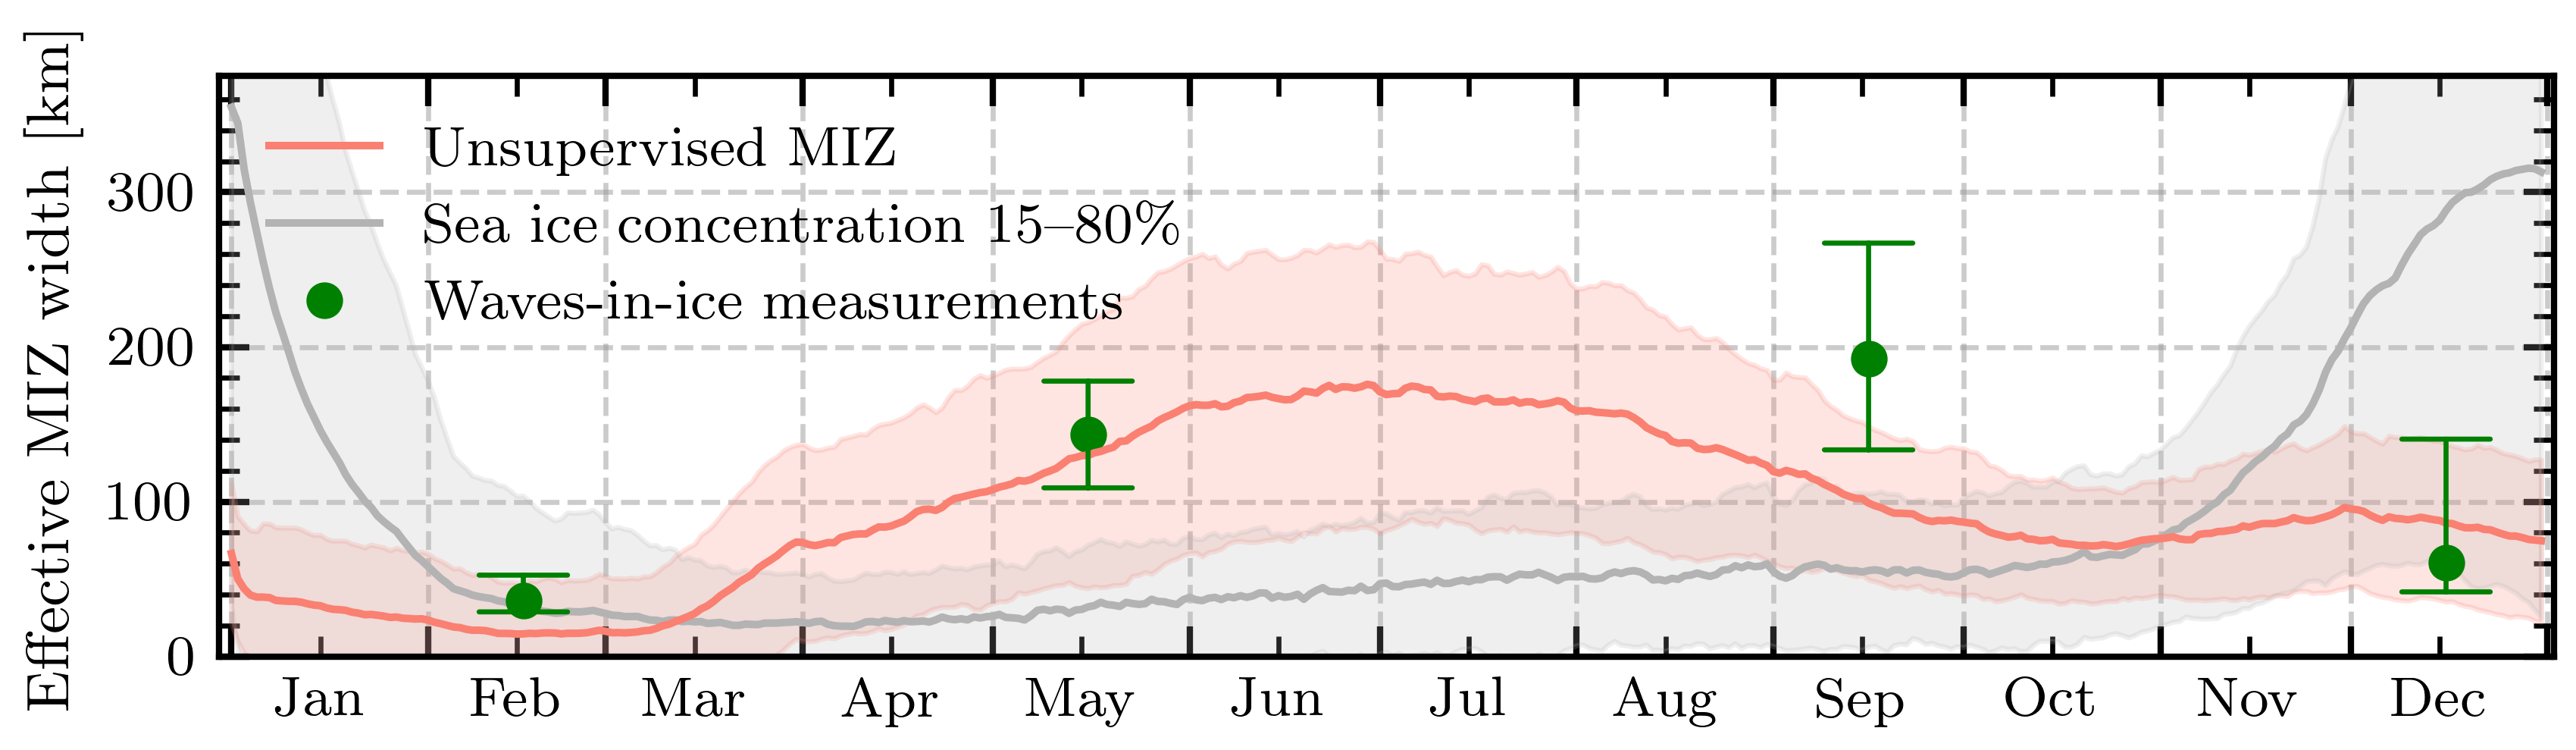

In [4]:
year_vec = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
COLOR_GREY = [0.7, 0.7, 0.7, 1.0]
# Loop over the files in that year

date = np.empty((365,1))
date[:,0] = np.arange(365)
for year_idx, year in enumerate(year_vec):
   
    # Open the file
    filename = "/g/data/ia40/sea-ice-classification/mizWidth_"+str(year)+".nc"
    ds = xr.open_dataset(filename)
    
    effective_miz_width_array = np.asarray(ds['effective'])
    absolute_miz_width_array = np.asarray(ds['absolute'])
    sic_array = np.asarray(ds['sic'])
    
    length_mat, width_mat = effective_miz_width_array.shape
    if length_mat == 366:
        #print('Leap year!')
        effective_miz_width_array = effective_miz_width_array[0:-1,:]
        sic_array = sic_array[0:-1,:]
    if year_idx == 0: 
        # First file, then initialise X_temp
        MIZ_vec = effective_miz_width_array.reshape(-1)
        SIC_vec = sic_array.reshape(-1)
        date_vec = np.tile(date, [1,width_mat]).reshape(-1)
    else:
        # Else just concatenate the new data on
        MIZ_vec = np.concatenate([MIZ_vec, effective_miz_width_array.reshape(-1)],axis=0)
        SIC_vec = np.concatenate([SIC_vec, sic_array.reshape(-1)],axis=0)
        date_vec = np.concatenate([date_vec, np.tile(date, [1,width_mat]).reshape(-1)],axis=0)


df_plot = pd.DataFrame({'date_idx': date_vec, 
                        'MIZ_vec': MIZ_vec/1000,
                        'SIC_vec': SIC_vec/1000,
                       }
                      )

filename = "/g/data/ia40/sea-ice-classification/mizWidth_nofsd_2019.nc"
ds_nofsd = xr.open_dataset(filename)
absolute_miz_width_array = np.asarray(ds_nofsd['absolute'])
MIZ_vec = absolute_miz_width_array.reshape(-1)
length_mat, width_mat = absolute_miz_width_array.shape
date_vec = np.tile(date, [1,width_mat]).reshape(-1)
df_plot_nofsd = pd.DataFrame({'date_idx': date_vec, 
                        'MIZ_vec': MIZ_vec/1000,
                       }
                      )

# Plot the MIZ widths
fig, ax = plt.subplots(figsize=(width, height/3))

brouwer_dates = [31+15,31+28+31+30+15,31+28+31+30+31+30+31+31+15,31+28+31+30+31+30+31+31+30+31+30+15]
brouwer_linear_centre = [36.187, 143.457, 192.569, 60.743]
brouwer_linear_lower = [20.679, 100.808, 125.363, 33.603]
brouwer_linear_upper = [60.743, 186.107, 275.283, 148.627]

COLOR_BROUWER = 'green'

sns.lineplot(ax=ax, x="date_idx", y="MIZ_vec", data = df_plot, errorbar=("sd", 1), legend=False, color=COLOR_MIZ, label = "Unsupervised MIZ", zorder=3)
sns.lineplot(ax=ax, x="date_idx", y="SIC_vec", data = df_plot, errorbar=("sd", 1), legend=False, color=COLOR_GREY, label = "Sea ice concentration 15--80\%")
#sns.lineplot(ax=ax, x="date_idx", y="MIZ_vec", data = df_plot_nofsd, errorbar=("sd", 1), legend=False, color="blue", label = "Unsupervised MIZ (no FSD) 2019")

plt.plot(brouwer_dates,brouwer_linear_centre, 'o',color=COLOR_BROUWER, label = 'Waves-in-ice observations') # , markersize=12
for day_idx in range(len(brouwer_dates)):
    ax.annotate('', 
                (brouwer_dates[day_idx], brouwer_linear_lower[day_idx]), (brouwer_dates[day_idx], brouwer_linear_upper[day_idx]),
                arrowprops=dict(arrowstyle='|-|, widthA=0.5, widthB=0.5', color=COLOR_BROUWER)
               )

set_ax_date(ax, plot_type="clim")
ax.set_xlim((np.round(ax.get_xlim()[0]+16),np.round(ax.get_xlim()[-1]-16)))
plt.ylabel("Effective MIZ width [km]")
ax.set_ylim([0, 375])
ax.set_xlabel('')
plt.legend(fancybox=False, edgecolor="white", loc='upper left', labelcolor='white', framealpha=0.0)

ax.legend(['Unsupervised MIZ','Sea ice concentration 15--80\%', 'Waves-in-ice measurements'], fancybox=False, edgecolor="black", loc='upper left', framealpha=0.0)
# leg = ax.get_legend()
# leg.legendHandles[0].set_color(COLOR_MIZ)
# leg.legendHandles[1].set_color('gray')
# leg.legendHandles[2].set_color(COLOR_BROUWER)

plt.show()

#fig.autofmt_xdate()
savepath = '/home/566/nd0349/notebooks/'
fig.savefig(savepath+'miz_width_2010_2019_black.png', dpi = 1000, transparent=True) 
fig.savefig(savepath+'miz_width_2010_2019_black.pdf') 

# Timeseries: Variables

In [ ]:
df_dyn = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/velocities_2010_2019.csv')
dates = pd.to_datetime(df_dyn['date'].values, format='%Y-%m-%d')
df_dyn['month-day'] = dates.strftime('%m-%d')
df_dyn.drop(df_dyn[df_dyn['month-day'] == '02-29'].index, inplace = True)
df_dyn['month-day'] = pd.to_datetime(df_dyn['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df_dyn['date'].values, format='%Y-%m-%d')
df_dyn['year'] = dates.strftime('%Y')
df_dyn['year'] = pd.to_datetime(df_dyn['year'].values, format='%Y')


idx = (df_dyn['k'].values == 0)
df_MIZ = df_dyn.iloc[idx,:].copy()
#print(df_MIZ)


idx = (df_dyn['k'].values == 2)
temp_vec = df_dyn['k'].values
temp_vec[idx] = 1
df_dyn['k'] = temp_vec

idx = (df_dyn['k'].values == 1)
df_interior = df_dyn.iloc[idx,:].copy()

In [ ]:
# Read in MIZ width
year_range = range(2010,2020)# = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Loop over the files in that year
for year_idx, year in tqdm(enumerate(year_range), total=len(year_range)):

    # Open the file
    filename = "/g/data/ia40/sea-ice-classification/mizWidth_"+str(year)+".nc"
    ds = xr.open_dataset(filename)
    effective_miz_width_array = np.asarray(ds['absolute'])
    length_array, width_array = effective_miz_width_array.shape

    date = np.empty((length_array,1))
    date[:,0] = np.arange(length_array)

    if year_idx == 0: 
        # First file, then initialise X_temp
        MIZ_vec = effective_miz_width_array.reshape(-1)
        length_array, width_array = effective_miz_width_array.shape
        date_vec = np.tile(date, [1,width_array]).reshape(-1)
    else:
        # Else just concatenate the new data on
        MIZ_vec = np.concatenate([MIZ_vec, effective_miz_width_array.reshape(-1)],axis=0)
        date_vec = np.concatenate([date_vec, np.tile(date, [1,width_array]).reshape(-1)],axis=0)

s = pd.date_range(start=str(year_range[0])+"-01-01",end=str(year_range[-1])+"-12-31")

from datetime import datetime
test = datetime.fromordinal(int(date_vec[0]+1+693595)) # start on Jan 1st 1900
test.strftime('%Y-%m-%d')
date = []
for i,day_idx in tqdm(enumerate(date_vec), total = len(date_vec)):
    tmp = datetime.fromordinal(int(day_idx+1+693595))
    date.append(tmp.strftime('%Y-%m-%d'))
    
df_plot = pd.DataFrame({'date': date, # For only month day use %m-%d
                        #'month_day': s.strftime('%m-%d'),
                        #'year': s.year,
                        'MIZ_vec': MIZ_vec/1000})

df_plot 
dates = pd.to_datetime(df_plot['date'].values, format='%Y-%m-%d')
df_plot['month-day'] = dates.strftime('%m-%d')
df_plot.drop(df_plot[df_plot['month-day'] == '02-29'].index, inplace = True)
df_plot['month-day'] = pd.to_datetime(df_plot['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df_plot['date'].values, format='%Y-%m-%d')
df_plot['year'] = dates.strftime('%Y')
df_plot['year'] = pd.to_datetime(df_plot['year'].values, format='%Y')


# sns.lineplot(x="month-day", y="MIZ_vec", errorbar=("sd", 1),
#              data=df_plot)
# plt.ylim((0,200))

In [3]:
df_miz_ts = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/miz_ts_2010_2019.csv')
dates = pd.to_datetime(df_miz_ts['date'].values, format='%Y-%m-%d')
df_miz_ts['month-day'] = dates.strftime('%m-%d')
df_miz_ts.drop(df_miz_ts[df_miz_ts['month-day'] == '02-29'].index, inplace = True)
df_miz_ts['month-day'] = df_miz_ts['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df_miz_ts['date'].values, format='%Y-%m-%d')
df_miz_ts['year'] = dates.strftime('%Y')
df_miz_ts['year'] = pd.to_datetime(df_miz_ts['year'].values, format='%Y')
#df_miz_ts.groupby(['date']).mean().shape

In [7]:
idx2 = (df_miz_ts['k'].values == 2)

df_temp = df_miz_ts
temp_vec = df_temp['k'].values
temp_vec[idx2] = 1
df_temp['k'] = temp_vec

idx0 = (df_temp['k'].values == 0)
df_MIZ = df_temp.iloc[idx0,:]


idx1 = (df_temp['k'].values == 1)
df_interior = df_temp.iloc[idx1,:]

### Bar charts summer vs winter of the MIZ

In [44]:
df_MIZ.head(3)
idx_summer1 = df_MIZ['month-day'] < pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_summer2 = df_MIZ['month-day'] > pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_summer = np.logical_or(idx_summer1, idx_summer2)
df_MIZ_summer = df_MIZ.iloc[idx_summer.values,:]

idx_winter1 = df_MIZ['month-day'] >= pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_winter2 = df_MIZ['month-day'] <= pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_winter = np.logical_or(idx_winter1, idx_winter2)
df_MIZ_winter = df_MIZ.iloc[idx_winter.values,:]

In [45]:
df_MIZ_winter['fsdrad'].mean()

25.348979494342295

In [31]:
df_MIZ_summer.describe()

Unnamed: 0.1     Unnamed: 0         k         frazil         congel  \
count  9.689240e+05  968924.000000  968924.0  968924.000000  968924.000000   
mean   1.256360e+06  145270.165512       0.0       0.293208       0.225074   
std    7.074803e+05   95017.206005       0.0       0.735192       0.652559   
min    0.000000e+00       0.000000       0.0       0.000000       0.000000   
25%    6.793688e+05   24231.000000       0.0       0.000000       0.000000   
50%    1.207450e+06  194924.000000       0.0       0.000000       0.000000   
75%    1.901684e+06  219377.000000       0.0       0.194390       0.001740   
max    2.436002e+06  272327.000000       0.0       9.687109       6.278060   

         wave_sig_ht         daidtd         daidtt           divu  \
count  968924.000000  968924.000000  968924.000000  968924.000000   
mean        0.499908      -0.967540      -1.015455      -0.128678   
std         0.710372       7.643899      13.617132       6.357528   
min         0.000000    -120.464820    -102.347030    -130.587390   
25%         0.010411      -3.223675      -5.369179      -1.508201   
50%         0.204120      -0.540054      -2.225953       0.135827   
75%         0.724520       1.449106      -0.114178       1.424165   
max         9.993382      97.774090     193.774150     154.120680   

                uatm  ...           vvel     dafsd_wave     dafsd_latg  \
count  968924.000000  ...  968924.000000  968924.000000  968924.000000   
mean        1.038680  ...       0.007138      -1.473964       0.000031   
std         6.484221  ...       0.101738       5.309856       0.000094   
min       -29.152710  ...      -0.390977    -281.484782       0.000000   
25%        -3.455939  ...      -0.060063      -0.103723       0.000000   
50%         1.333637  ...       0.003097       0.000000       0.000000   
75%         5.738266  ...       0.072850       0.000000       0.000013   
max        25.818160  ...       0.613971       0.000002       0.002253   

          dafsd_latm     dafsd_weld     dafsd_newi           aice  \
count  968924.000000  968924.000000  968924.000000  968924.000000   
mean       -0.014959       0.098334       0.246897       0.607554   
std         0.078042       1.406991       3.099694       0.246515   
min        -1.801590       0.000000       0.000000       0.150000   
25%        -0.003550       0.000000       0.000000       0.398006   
50%        -0.001189       0.000000       0.000000       0.641694   
75%        -0.000381       0.000605       0.008446       0.820910   
max         0.000000     217.890760     242.250931       0.999987   

              fsdrad           iage             hi  
count  968924.000000  968924.000000  968924.000000  
mean       46.317585       0.538429       0.631028  
std        91.629802       0.271199       0.521705  
min         0.448067       0.000417       0.005224  
25%         2.944499       0.404804       0.270471  
50%         8.220147       0.537939       0.501317  
75%        37.665238       0.644343       0.841559  
max       578.763300       1.869435       5.431555  

[8 rows x 22 columns]

In [55]:
pd.to_datetime('1900-05-01', format="%Y-%m-%d")
df_MIZ_summer['iage'].mean()

0.5384288271794001

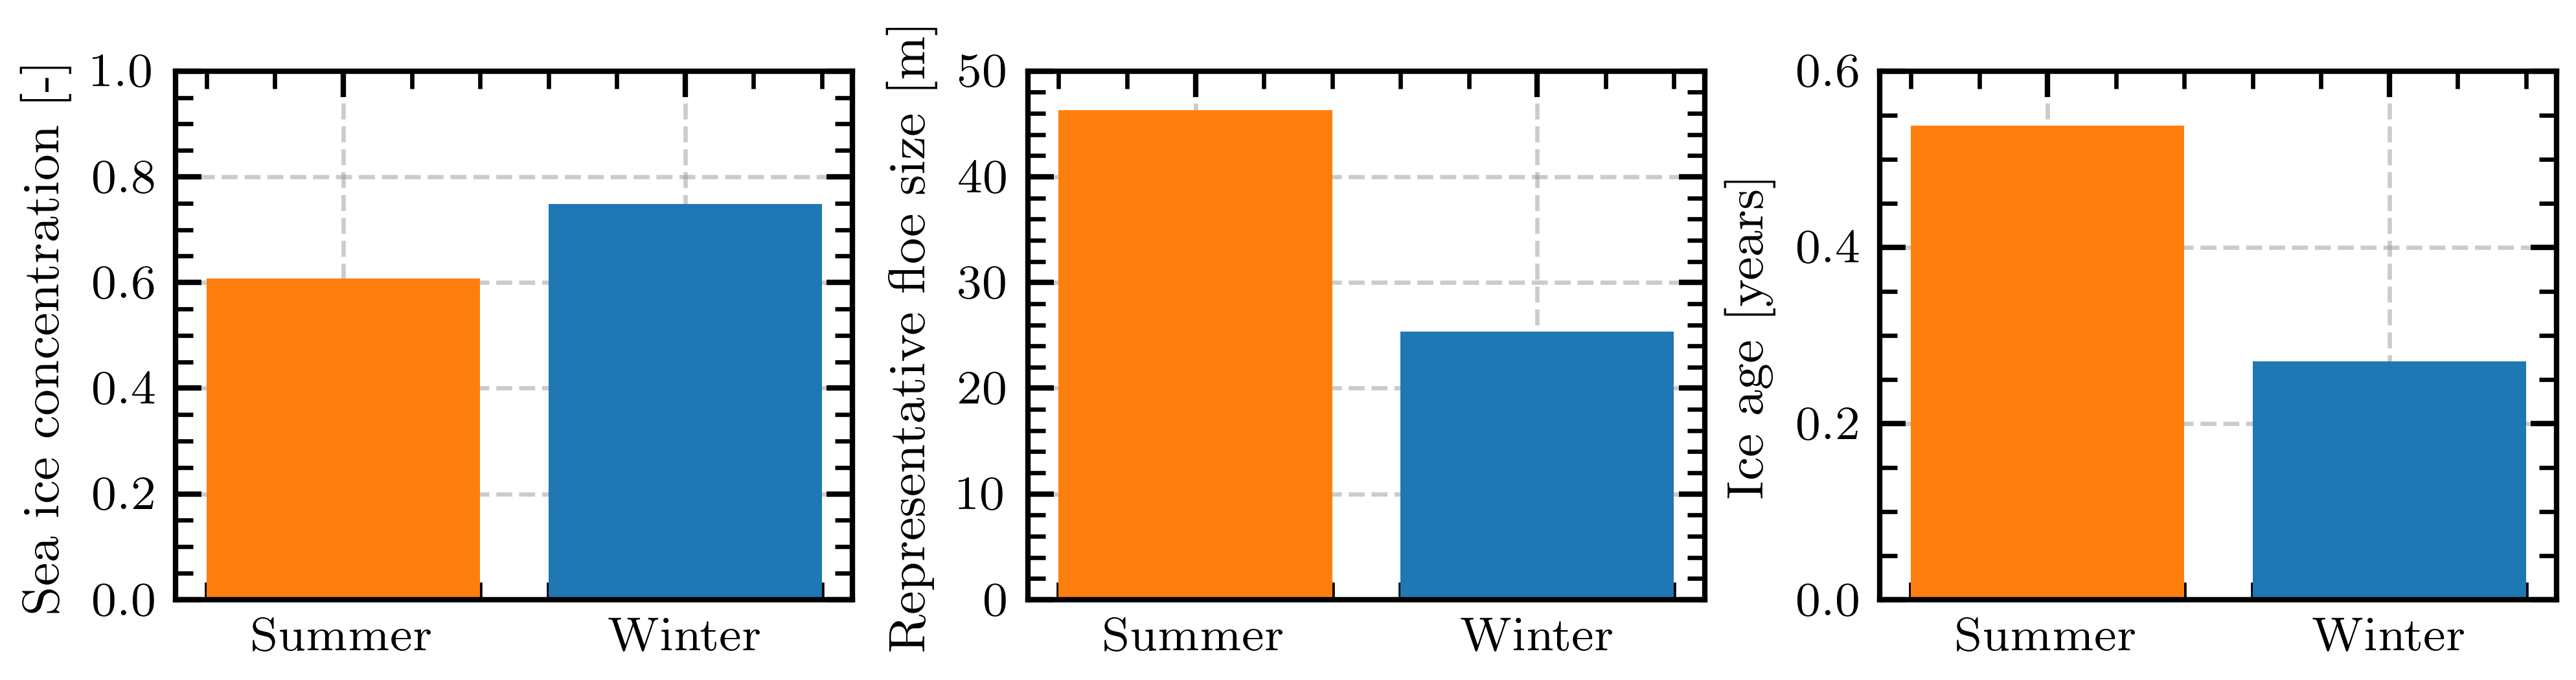

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(width,height/3), sharex=False)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


bar_labels = ['red', 'blue']
bar_colors = ['tab:orange', 'tab:blue']

seasons = ['Summer', 'Winter']
mean_values = [df_MIZ_summer['aice'].mean(), df_MIZ_winter['aice'].mean()]
ax1.bar(seasons, mean_values, label=bar_labels, color=bar_colors)
ax1.set_ylabel('Sea ice concentration [-]')
ax1.set_ylim((0,1))
#ax1.set_title('Fruit supply by kind and color')
#ax1.legend(title='Fruit color')

seasons = ['Summer', 'Winter']
mean_values = [df_MIZ_summer['fsdrad'].mean(), df_MIZ_winter['fsdrad'].mean()]
ax2.bar(seasons, mean_values, label=bar_labels, color=bar_colors)
ax2.set_ylabel('Representative floe size [m]')
ax2.set_ylim((0,50))

seasons = ['Summer', 'Winter']
mean_values = [df_MIZ_summer['iage'].mean(), df_MIZ_winter['iage'].mean()]
ax3.bar(seasons, mean_values, label=bar_labels, color=bar_colors)
ax3.set_ylabel('Ice age [years]')
ax3.set_ylim((0,0.6))

fig.tight_layout(pad=0.25)
plt.show()

/jobfs/93389961.gadi-pbs/ipykernel_3429936/2674012365.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([df_MIZ_summer['aice'], df_MIZ_winter['aice']])
/jobfs/93389961.gadi-pbs/ipykernel_3429936/2674012365.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([df_MIZ_summer['fsdrad'], df_MIZ_winter['fsdrad']])
/jobfs/93389961.gadi-pbs/ipykernel_3429936/2674012365.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

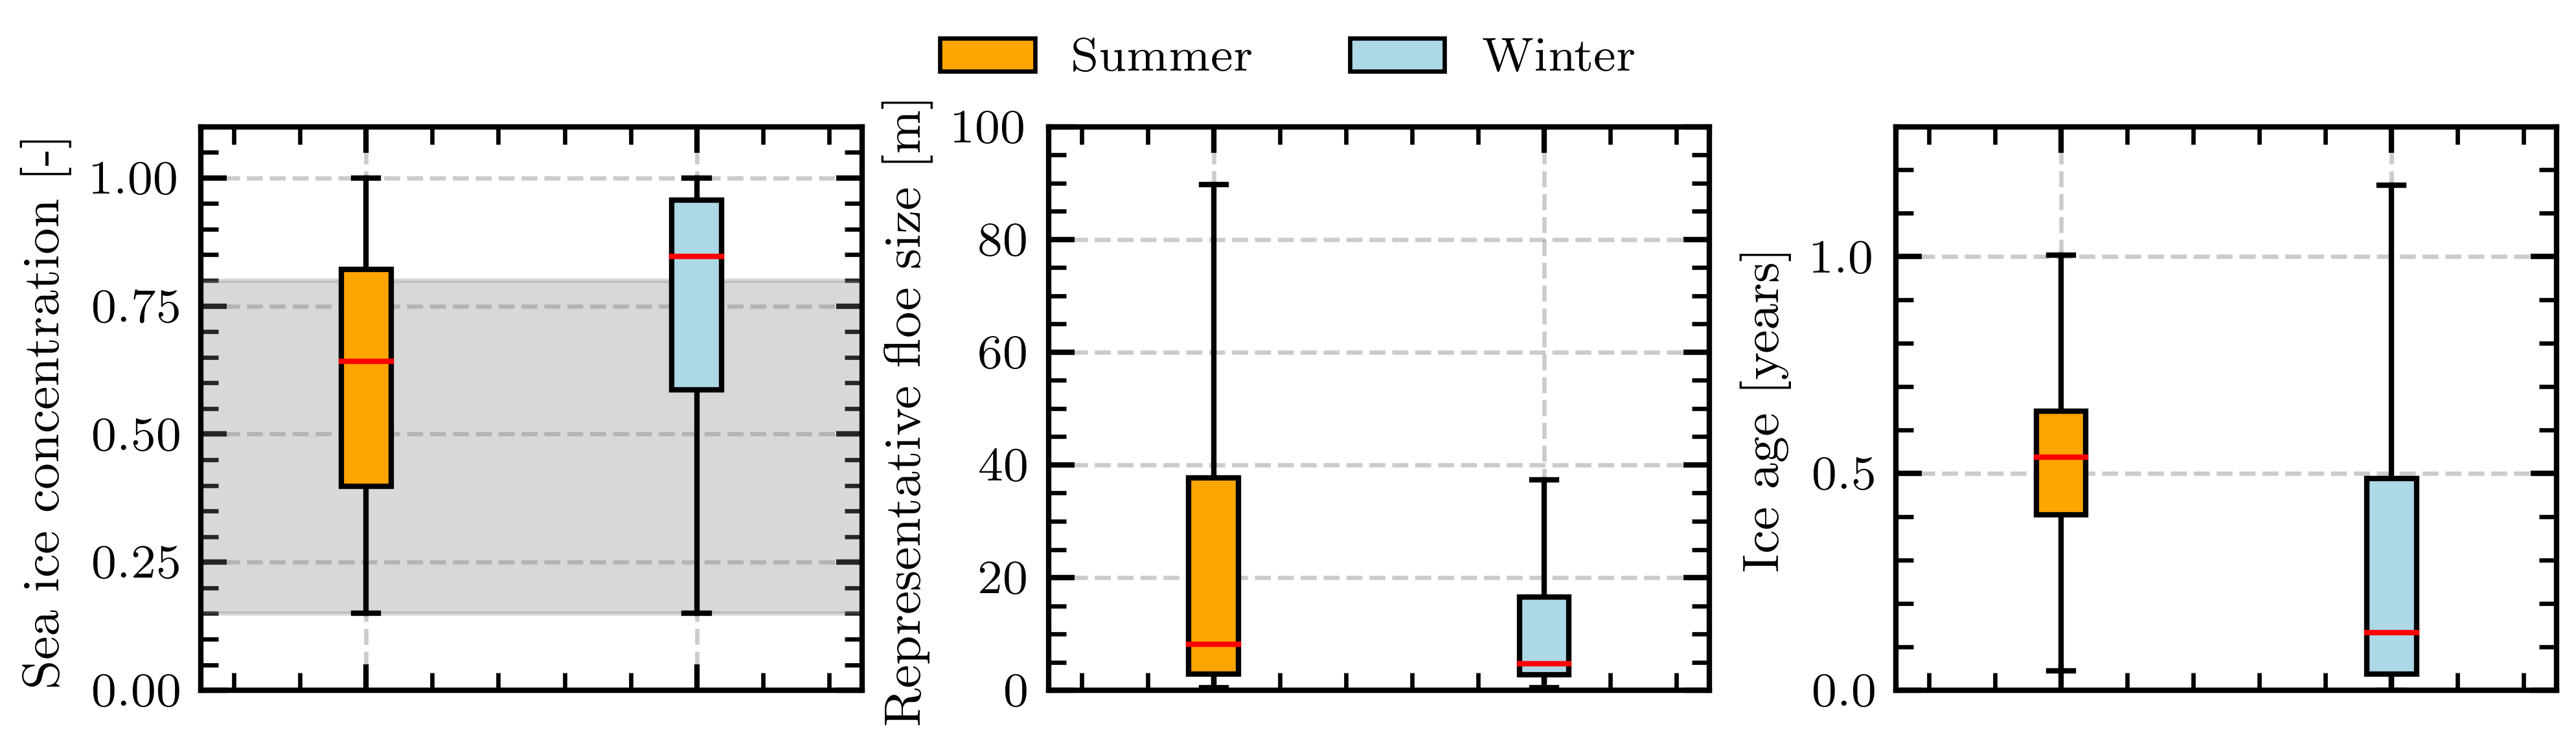

In [104]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib_scalebar.scalebar import ScaleBar

fig, axes = plt.subplots(1, 3, figsize=(width,height/3), sharex=False)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

seasons = ['Summer', 'Winter']


data = np.asarray([df_MIZ_summer['aice'], df_MIZ_winter['aice']])
bplot1 = ax1.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax1.set_ylim((0,1.1))
ax1.set_ylabel("Sea ice concentration [-]")
ax1.set_xticklabels([])
ax1.axhspan(0.15, 0.8, color='gray', alpha=0.3, linestyle ='-')


font = {'family':'serif','size':6}
#scalebar = ScaleBar(0.3, rotation="vertical", sep = 1, location="lower left", height_fraction=0.002, font_properties = font,
#                    scale_formatter=lambda value, unit: f"", label = "15-", label_loc="right", box_alpha=0.0, border_pad=0.5)
#ax1.add_artist(scalebar)



data = np.asarray([df_MIZ_summer['fsdrad'], df_MIZ_winter['fsdrad']])
bplot2 = ax2.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax2.set_ylim((0,100))
ax2.set_ylabel("Representative floe size [m]")
ax2.set_xticklabels([])

data = np.asarray([df_MIZ_summer['iage'], df_MIZ_winter['iage']])
bplot3 = ax3.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax3.set_ylim((0,1.3))
ax3.set_ylabel("Ice age [years]")
ax3.set_xticklabels([])

# fill with colors
colors = ['orange', 'lightblue']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# ax2.legend(['Summer','Winter'], fancybox=False, edgecolor="black")
# sns.move_legend(ax2, "upper center", bbox_to_anchor=(.5, 1.26), ncol=2, title=None, frameon=True, 
#                 fancybox=False, edgecolor='black', framealpha=0.0)
fig.tight_layout(pad=0.25) 

handles, labels = ax1.get_legend_handles_labels()
line1 = Line2D([0], [0], label='Summmer', color='orange')
line2 = Line2D([0], [0], label='Winter', color='lightblue')
                                                       

# add manual symbols to auto legend
#handles.extend([line1, line2])
plt.legend(handles=handles, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.15), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)


legend_elements = [Patch(facecolor='orange', edgecolor='black',
                         label='Summer'),
                   Patch(facecolor='lightblue', edgecolor='black',
                         label='Winter'),
                  ]
plt.legend(handles=legend_elements, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.05), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)

#ax.legend(handles=legend_elements, loc='center')

#

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'variable_summer_winter_boxplot.png', dpi = 1000, bbox_inches="tight", transparent=True)
plt.show()

ValueError: If using all scalar values, you must pass an index

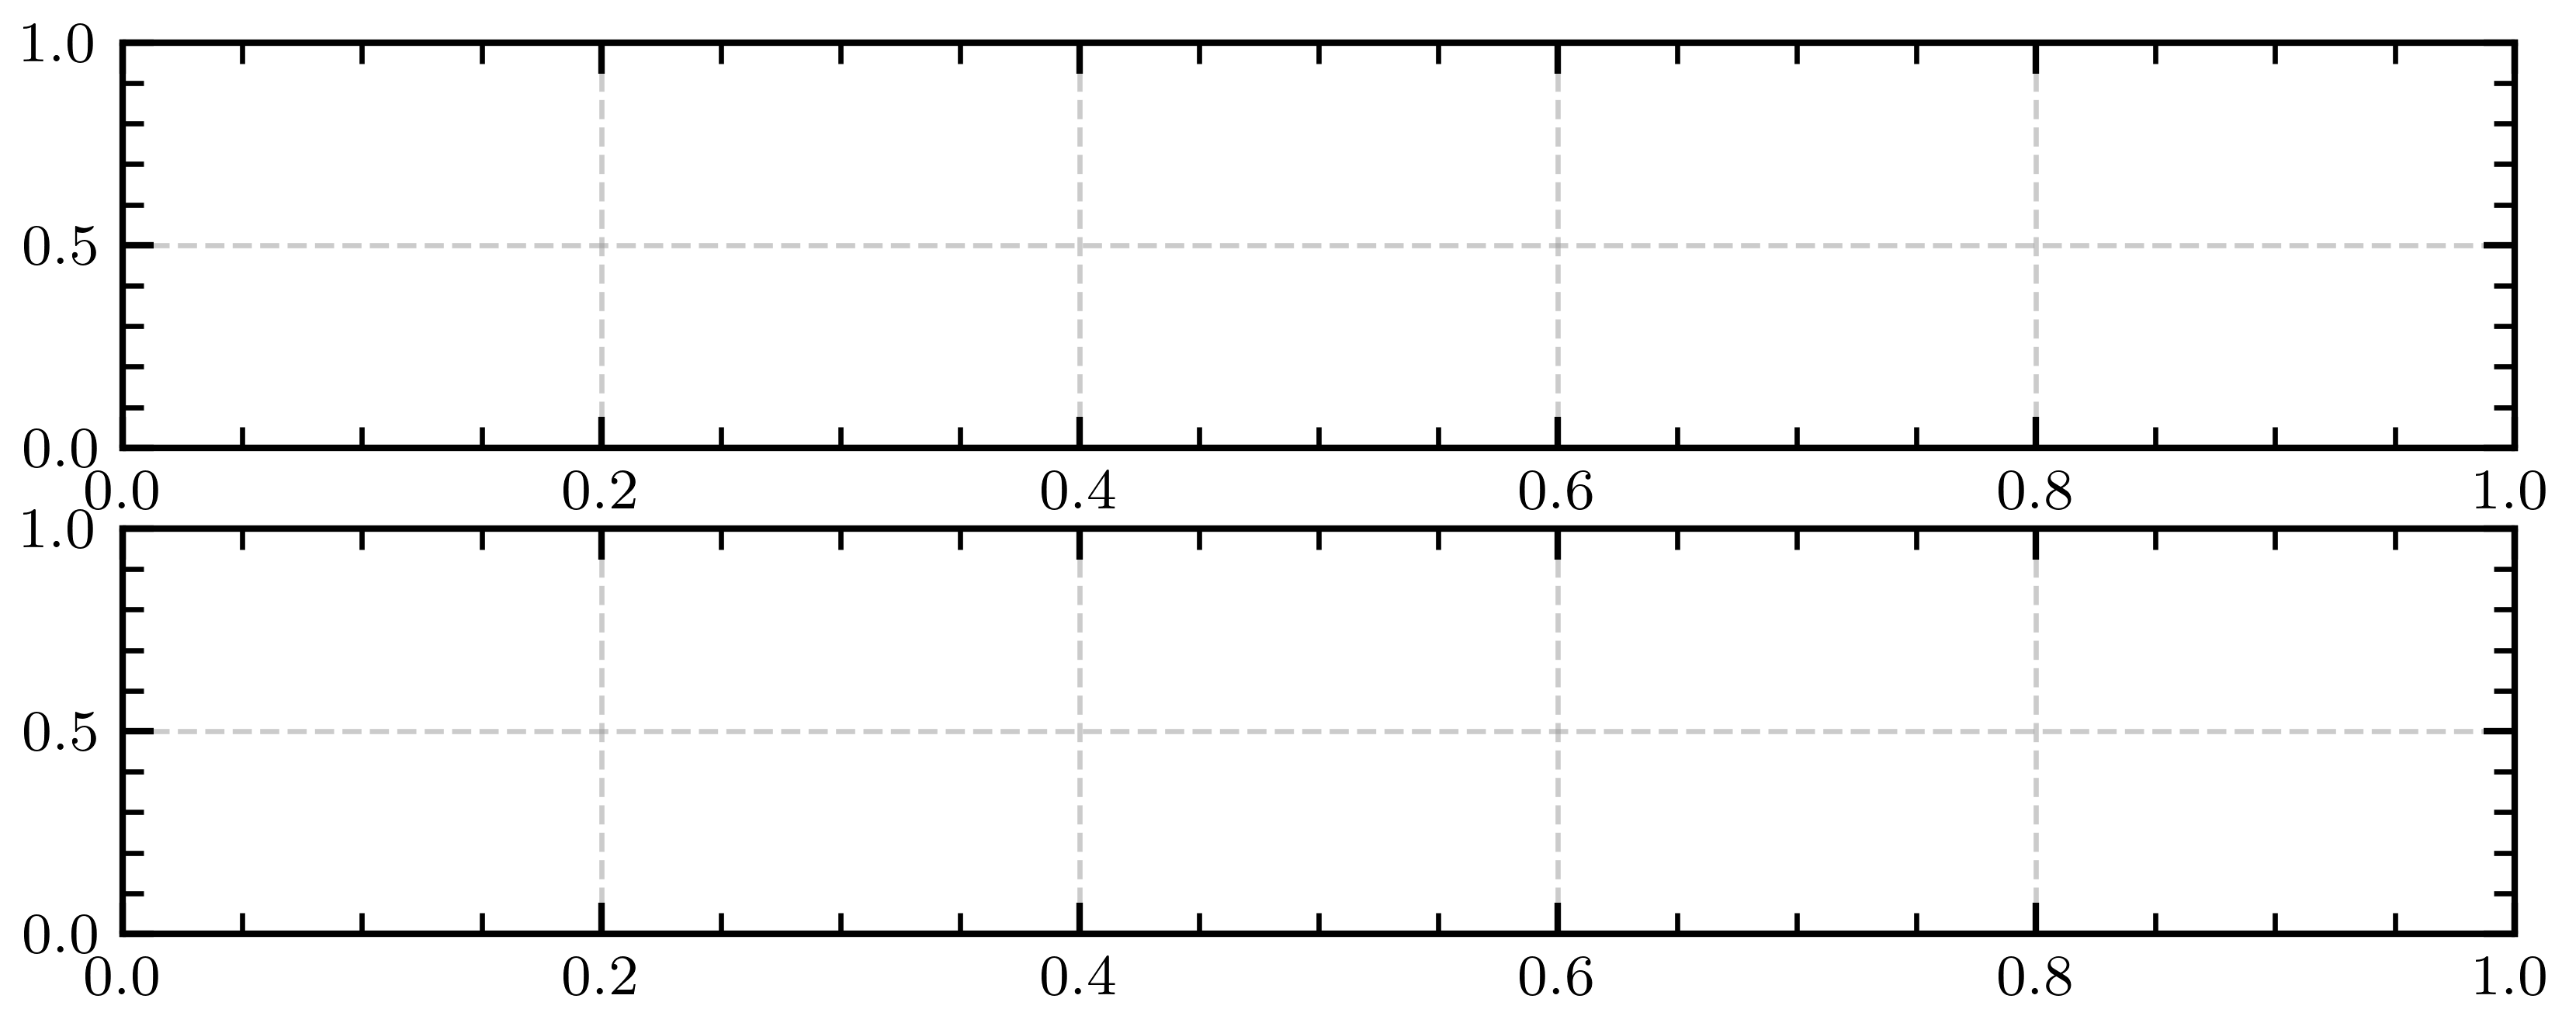

In [39]:

fig, axes = plt.subplots(2, 1, figsize=(width,height/2), sharex=False)
ax1 = axes[0]
ax2 = axes[1]
# Get the FSD processes into a plotting dataframe
df_grouped = df_MIZ_summer[["aice", "fsdrad", "iage", "k"]].mean(numeric_only=True)
#df_plot_fsd = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
#                        '2': df_grouped.iloc[1,:].values,
#                        '3': df_grouped.iloc[2,:].values},
#                        index=xtick_labels_fsd)
df_plot = df_grouped

# # Get the melting processes into a plotting dataframe
# df_melt = pd.DataFrame({'k': df["k"].values,
#                              "date": df["date"].values,
#                              "meltt": df["meltt"].values*10,
#                              "meltl": df["meltl"].values,
#                              "meltb": df["meltb"].values,
#                             })
# df_grouped = df_melt[["meltb", "meltl", "meltt", "k"]].groupby('k').mean(numeric_only=True)
# df_plot_melt = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
#                         '2': df_grouped.iloc[1,:].values,
#                         '3': df_grouped.iloc[2,:].values},
#                         index=['Basal melt', 'Lateral melt', 'Top melt'])


df_plot_fsdrad = pd.DataFrame({'fsdrad': df_plot["fsdrad"]})
df_plot_fsdrad.plot(ax = ax1, kind='bar', stacked=False, 
             color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)],
             )

#ax1.set_ylabel('Change in representative\nfloe size, $dr_a/dt$ [m/day]')
#ax1.set_xticklabels(labels=xtick_labels_fsd, rotation=45)
ax1.axhline(y = 0.0, color = 'black', linestyle = '-', linewidth = 1.0)



# df_plot_melt.plot(ax = ax2, kind='bar', stacked=False, 
#              color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)],legend=None,
#              linewidth=2)
# #ax1.set_ylim((0,2.5))

# ax2.set_ylabel('Melt rate [cm/day]')
# plt.xticks(rotation = 0)
# xtick_labels_melt = ['Basal melt', 'Lateral melt', 'Top melt ($10^{-1}$)']
# ax2.set_xticklabels(labels=xtick_labels_melt, rotation=45)
# plt.ylabel('Melt rate [cm/day]')
# ax2.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")


# ax1.get_legend().remove()
        
#    elif label == 'b)':

#add_subplot_label(fig, label)
# trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
# ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans,
#                fontsize='medium', verticalalignment='top', fontfamily='serif',
#                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax2.text(0.0, 1.0, 'b)', transform=ax2.transAxes + trans,
#                fontsize='medium', verticalalignment='top', fontfamily='serif',
#                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))


#ax_inset = fig.add_axes([pos1.x0, pos1.y0,  pos1.width / 2.0, pos1.height / 2.0])#([left_corner, 0.2, 0.1, 0.2])#,projection='linear')
       

fig.tight_layout(pad=0.25)

pos1 = ax1.get_position()
pos2 = ax2.get_position()
#plt.legend(['Cluster 1','Cluster 2','Cluster 3'], fancybox=False, edgecolor="black")
sns.move_legend(ax2, "upper center", bbox_to_anchor=(-0.1225, 1.25), ncol=3, title=None, frameon=True, fancybox=False, edgecolor='black')
# ((pos1.x0+pos1.width), pos1.y0+pos1.height)


savepath = '/home/566/nd0349/notebooks/'
#plt.savefig(savepath+'variable_summer_winter.png', dpi = 1000, bbox_inches="tight", transparent=True)


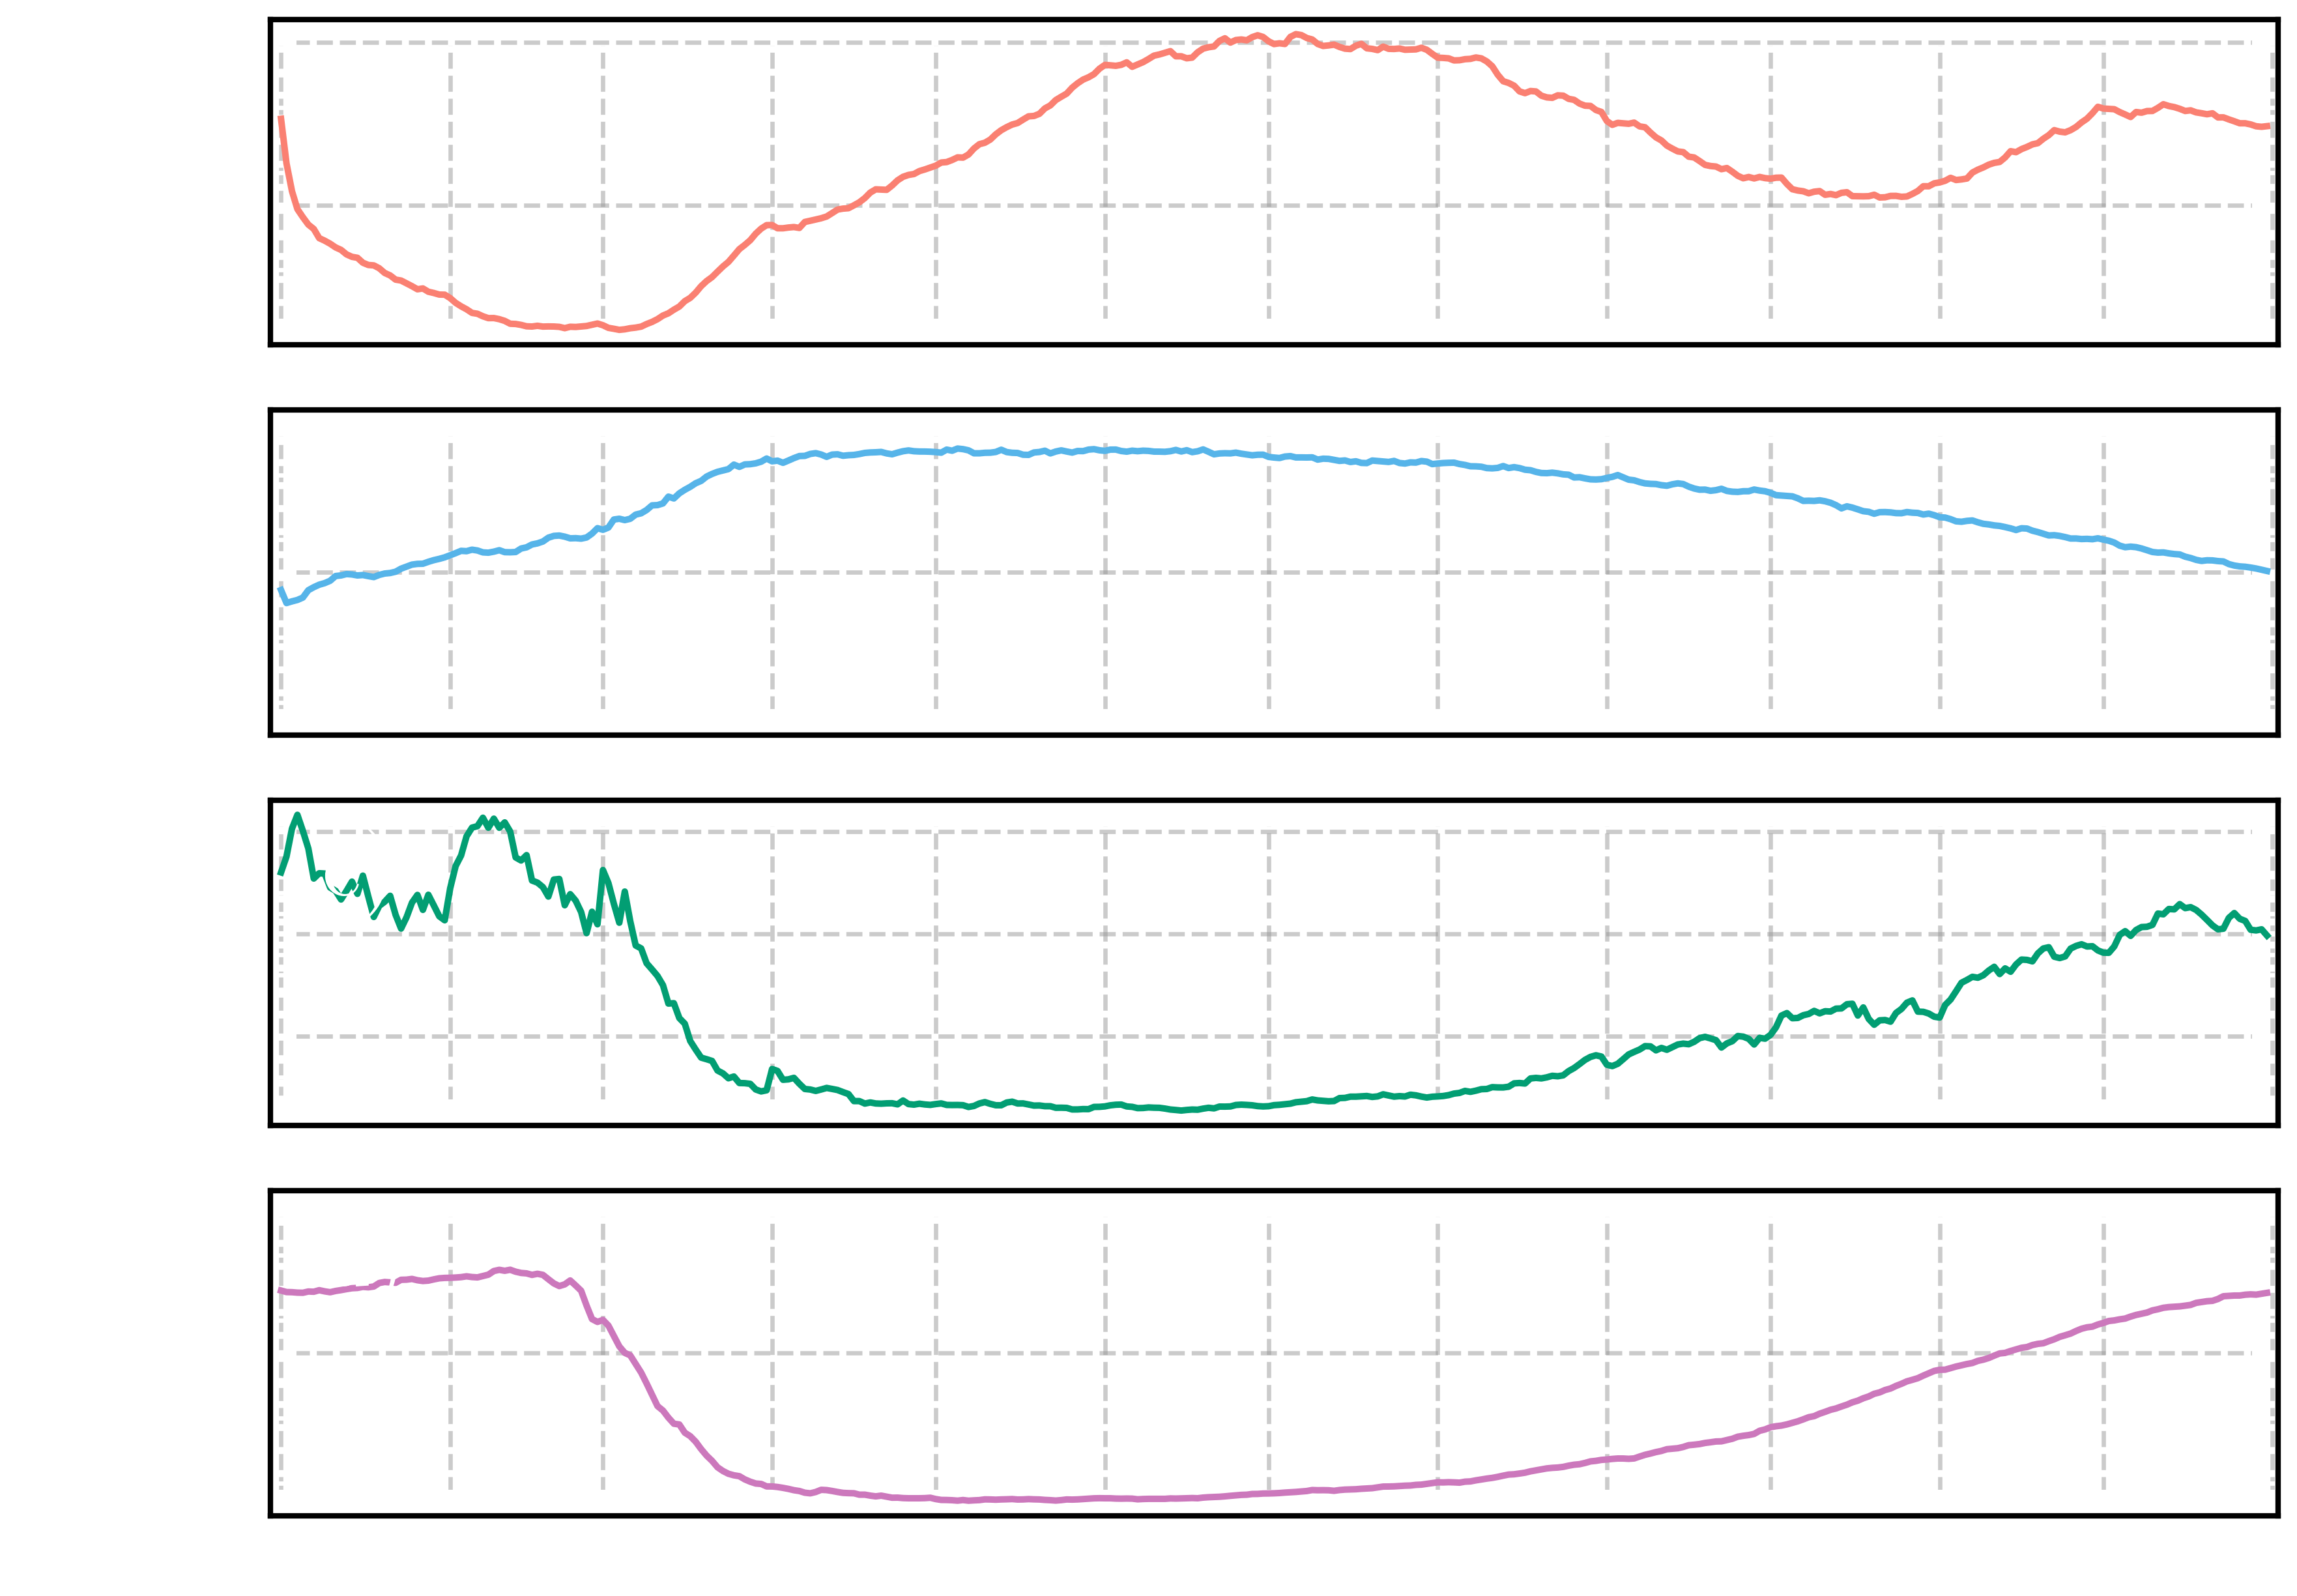

In [16]:
import textwrap
max_chars = 12

fig, axes = plt.subplots(4, 1, figsize=(width,height), sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

# MIZ width (uncorrected) ----------------------------------------------------------------------------
sns.lineplot(ax=ax1, x="month-day", y="MIZ_vec", data=df_plot, label=None,
              errorbar=None, legend=False, color=COLOR_MIZ)#, hue = 'year')



ax1.set_ylabel(textwrap.fill('MIZ width [km]', max_chars))
#ax1.set_xlim((np.round(ax1.get_xlim()[0]+16),np.round(ax1.get_xlim()[-1]-16)))
#set_ax_date(ax1, plot_type="clim")
ax1.set_xticklabels([])
monthly_locator = mdates.MonthLocator()
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.set_xlabel('')


# SIC ----------------------------------------------------------------------------
sns.lineplot(ax=ax2, x="month-day", y='aice', label=None,
              data=df_miz_ts, errorbar=None, color=sns.color_palette("colorblind",15)[9])
ax2.set_ylabel("Sea ice\n concentration [-]", color=COLOR)
#ax2.set_ylabel(textwrap.fill('Sea ice\n concentration [-]', max_chars))
ax2.set_xlabel("")
ax2.set_xticklabels([])
ax2.set_ylim((0,1))
#ax2.set_xlim((np.round(ax2.get_xlim()[0]+16),np.round(ax2.get_xlim()[-1]-16)))

#axtmp.set_xlim((np.round(axtmp.get_xlim()[0]+16),np.round(axtmp.get_xlim()[-1]-16)))
#axtmp.set_ylim((0, 100))
#legend = ax2.legend(['Floe size', 'SIC', 'Age'], fancybox=False, edgecolor="black", loc = 'lower center')# loc='upper right', ncol=1, fancybox=True, edgecolor="black")
#from matplotlib.lines import Line2D
#custom_lines = [Line2D([0], [0], color=COLOR_FSD, lw=1),
#                Line2D([0], [0], color=sns.color_palette("colorblind",15)[9], lw=1),
#                Line2D([0], [0], color=sns.color_palette("colorblind",15)[-1], lw=1)]
#ax2.legend(custom_lines, ['Floe size', 'SIC', 'Age'], fancybox=False, edgecolor="black", loc = 'center')
#set_ax_date(ax2, plot_type="clim")

ax2.set_xticklabels([])
#month_year_formatter = mdates.DateFormatter('%b') 
monthly_locator = mdates.MonthLocator()
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax2.xaxis.set_major_formatter(NullFormatter())
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax2.set_xlabel('')



# Floe size ----------------------------------------------------------------------------
sns.lineplot(ax=ax3, x=df_miz_ts["month-day"], y=df_miz_ts['fsdrad'], label=None, legend=False,
               errorbar=None, color= COLOR_FSD)#, legend=True)
#sns.lineplot(ax=ax3, x="month-day", y='dafsd_weld', label='Welding',
#              data=df_miz_ts, errorbar=None)#, legend=True)
#sns.lineplot(ax=ax3, x="month-day", y='dafsd_newi', label='New ice formation',
#              data=df_miz_ts, errorbar=None)#, legend=True)
#ax3.set_ylabel("Representive floe size\n [m/day]")
ax3.set_xlabel("")
ax3.set_xticklabels([])
ax3.set_ylabel(textwrap.fill('Representive\n floe size [m/day]', max_chars))
#ax3.set_xlim((np.round(ax3.get_xlim()[0]+16),np.round(ax3.get_xlim()[-1]-16)))

#month_year_formatter = mdates.DateFormatter('%b') 
monthly_locator = mdates.MonthLocator()
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax3.xaxis.set_major_formatter(NullFormatter())
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax3.set_xlabel('')

# custom_lines = [Line2D([0], [0], color=sns.color_palette("colorblind",15)[0], lw=1),
#                 Line2D([0], [0], color=sns.color_palette("colorblind",15)[1], lw=1)]
# axtmp3.legend(custom_lines, ['Wave breakup', 'Ice speed'], fancybox=False, edgecolor="black", loc = 'upper right')


# Ice age ----------------------------------------------------------------------------
sns.lineplot(ax=ax4, x=df_miz_ts["month-day"], y=df_miz_ts['iage'], label=None, legend=False,
               errorbar=None, color= sns.color_palette("colorblind",15)[4])
ax4.set_xlim((np.round(ax4.get_xlim()[0]+16),np.round(ax4.get_xlim()[-1]-16)))
set_ax_date(ax4, plot_type="clim")
ax4.set(ylabel = "Ice age [years]", xlabel="", ylim=(0,1.0))
#ax4.set_ylabel(textwrap.fill('Ice age [years]', max_chars))


trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans,
               fontsize='large', verticalalignment='top', fontfamily='serif',
               bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax2.text(0.0, 1.0, 'b)', transform=ax2.transAxes + trans,
               fontsize='large', verticalalignment='top', fontfamily='serif',
               bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax3.text(0.0, 1.0, 'c)', transform=ax3.transAxes + trans,
               fontsize='large', verticalalignment='top', fontfamily='serif',
               bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
ax4.text(0.0, 1.0, 'd)', transform=ax4.transAxes + trans,
               fontsize='large', verticalalignment='top', fontfamily='serif',
               bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
    

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'seasonal_MIZ_black.png', dpi = 600, bbox_inches="tight", transparent=True)
plt.savefig(savepath+'seasonal_MIZ_black.pdf')
plt.show()

# Bar chart of summer vs winter FSD and melt rates

In [3]:
year_range = range(2015,2020)

df = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/forcing_analysis_'+str(year)+'.csv') 
                for year in tqdm(year_range, total = len(year_range), desc = "Reading in forcing analysis data")),
                ignore_index=True)
df_fsd = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/analysis_fsd_raw_'+str(year)+'.csv') 
                for year in tqdm(year_range, total = len(year_range), desc = "Reading in FSD analysis data")),
                ignore_index=True)
df_kmeans = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/kmeans_'+str(year)+'.csv') 
                for year in tqdm(year_range, total = len(year_range), desc = "Reading in kmeans data")),
                ignore_index=True)

df['k'] = df_kmeans['k']
df_fsd['k'] = df_kmeans['k']
unique_dates = df_fsd['date'].unique()
df.groupby('k').describe()


Reading in kmeans data: 100%|██████████| 5/5 [00:22<00:00,  4.49s/it]


Unnamed: 0                                                            \
       count          mean           std     min        25%        50%   
k                                                                        
0  1258769.0  3.491902e+06  1.937052e+06  4398.0  1991671.0  3348734.0   
1  2840633.0  3.440541e+06  1.311233e+06  4067.0  2401505.0  3366420.0   
2  6580504.0  4.057574e+06  1.779162e+06   564.0  2782859.0  4323142.5   

                               uvel            ... longitude         \
          75%        max      count      mean  ...       75%    max   
k                                              ...                    
0  5126140.00  6905421.0  1258769.0  0.083636  ...     269.5  359.5   
1  4433859.00  6905375.0  2840633.0  0.045785  ...     266.5  359.5   
2  5536828.25  6905330.0  6580504.0 -0.011853  ...     311.5  359.5   

    latitude                                                               \
       count       mean       std      min       25%        50%       75%   
k                                                                           
0  1258769.0 -63.735005  4.586050 -77.6299 -66.69558 -63.230583 -60.61449   
1  2840633.0 -65.310450  4.066469 -77.6299 -68.22556 -65.031620 -62.59954   
2  6580504.0 -70.767287  4.080797 -77.6299 -74.10892 -71.306650 -67.73019   

             
        max  
k            
0 -53.03830  
1 -53.03830  
2 -56.23934  

[3 rows x 328 columns]

In [5]:
dates = pd.to_datetime(df_fsd['date'].values, format='%Y-%m-%d')
df_fsd['month-day'] = dates.strftime('%m-%d')
df_fsd.drop(df_fsd[df_fsd['month-day'] == '02-29'].index, inplace = True)
df_fsd['month-day'] = pd.to_datetime(df_fsd['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df_fsd['date'].values, format='%Y-%m-%d')
df_fsd['year'] = dates.strftime('%Y')
df_fsd['year'] = pd.to_datetime(df_fsd['year'].values, format='%Y')
#df_miz_ts.groupby(['date']).mean().shape

In [6]:
idx2 = (df_fsd['k'].values == 2)

df_temp = df_fsd
temp_vec = df_temp['k'].values
temp_vec[idx2] = 1
df_temp['k'] = temp_vec

idx0 = (df_temp['k'].values == 0)
df_MIZ = df_temp.iloc[idx0,:]


idx1 = (df_temp['k'].values == 1)
df_interior = df_temp.iloc[idx1,:]

In [9]:
df_MIZ.head(3)
idx_summer1 = df_MIZ['month-day'] < pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_summer2 = df_MIZ['month-day'] > pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_summer = np.logical_or(idx_summer1, idx_summer2)
df_MIZ_summer = df_MIZ.iloc[idx_summer.values,:]

idx_winter1 = df_MIZ['month-day'] >= pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_winter2 = df_MIZ['month-day'] <= pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_winter = np.logical_or(idx_winter1, idx_winter2)
df_MIZ_winter = df_MIZ.iloc[idx_winter.values,:]

/jobfs/93784012.gadi-pbs/ipykernel_1598132/749507839.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([df_MIZ_summer['dafsd_wave'], df_MIZ_winter['dafsd_wave']])
/jobfs/93784012.gadi-pbs/ipykernel_1598132/749507839.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([df_MIZ_summer['dafsd_weld'], df_MIZ_winter['dafsd_weld']])
/jobfs/93784012.gadi-pbs/ipykernel_1598132/749507839.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

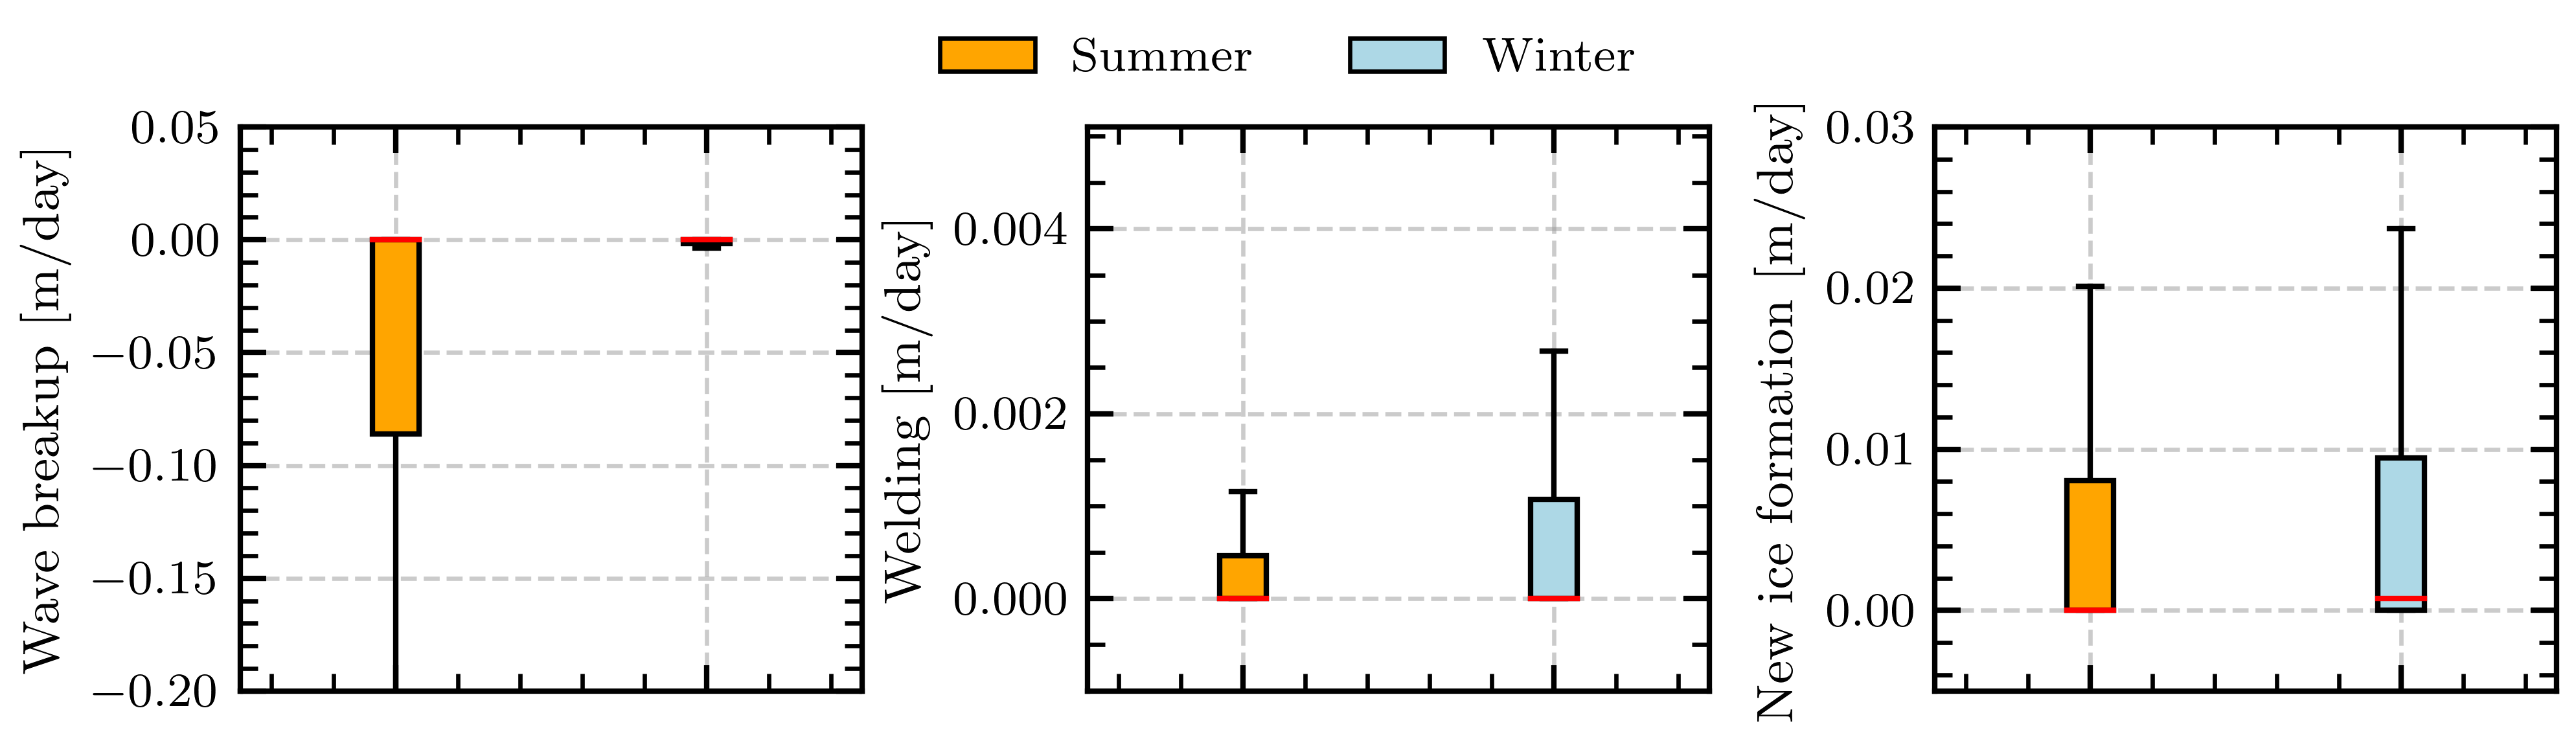

In [18]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib_scalebar.scalebar import ScaleBar

fig, axes = plt.subplots(1, 3, figsize=(width,height/3), sharex=False)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

seasons = ['Summer', 'Winter']


data = np.asarray([df_MIZ_summer['dafsd_wave'], df_MIZ_winter['dafsd_wave']])
bplot1 = ax1.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax1.set_ylim((-0.2,0.05))
ax1.set_ylabel("Wave breakup [m/day]")
ax1.set_xticklabels([])
#ax1.axhspan(0.15, 0.8, color='gray', alpha=0.3, linestyle ='-')


font = {'family':'serif','size':6}
#scalebar = ScaleBar(0.3, rotation="vertical", sep = 1, location="lower left", height_fraction=0.002, font_properties = font,
#                    scale_formatter=lambda value, unit: f"", label = "15-", label_loc="right", box_alpha=0.0, border_pad=0.5)
#ax1.add_artist(scalebar)



data = np.asarray([df_MIZ_summer['dafsd_weld'], df_MIZ_winter['dafsd_weld']])
bplot2 = ax2.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax2.set_ylim((-0.001,0.0051))
ax2.set_ylabel("Welding [m/day]")
ax2.set_xticklabels([])

data = np.asarray([df_MIZ_summer['dafsd_newi'], df_MIZ_winter['dafsd_newi']])
bplot3 = ax3.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
ax3.set_ylim((-0.005,0.03))
ax3.set_ylabel("New ice formation [m/day]")
ax3.set_xticklabels([])

# fill with colors
colors = ['orange', 'lightblue']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# ax2.legend(['Summer','Winter'], fancybox=False, edgecolor="black")
# sns.move_legend(ax2, "upper center", bbox_to_anchor=(.5, 1.26), ncol=2, title=None, frameon=True, 
#                 fancybox=False, edgecolor='black', framealpha=0.0)
fig.tight_layout(pad=0.25) 

handles, labels = ax1.get_legend_handles_labels()
line1 = Line2D([0], [0], label='Summmer', color='orange')
line2 = Line2D([0], [0], label='Winter', color='lightblue')
                                                       

# add manual symbols to auto legend
#handles.extend([line1, line2])
plt.legend(handles=handles, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.15), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)


legend_elements = [Patch(facecolor='orange', edgecolor='black',
                         label='Summer'),
                   Patch(facecolor='lightblue', edgecolor='black',
                         label='Winter'),
                  ]
plt.legend(handles=legend_elements, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.05), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)

#ax.legend(handles=legend_elements, loc='center')

#

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'dafsd_summer_winter_boxplot.png', dpi = 1000, bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
df_grouped = df_MIZ[["dafsd_wave", "dafsd_weld", "dafsd_newi", "dafsd_latm", "dafsd_latg", "k"]].groupby('k').mean(numeric_only=True)
df_grouped["dafsd_latm"] = df_grouped["dafsd_latm"]*100#.values*(10^5)
df_grouped["dafsd_latg"] = df_grouped["dafsd_latg"]*100000
# , "dafsd_latm", "dafsd_latg"
xtick_labels_fsd = ['Wave breakup', 'Welding', 'New floe\nformation', 'Lateral melt\n($10^{-2}$)', 'Lateral\ngrowth ($10^{-5}$)']
df_plot_fsd = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
                        '2': df_grouped.iloc[1,:].values,
                        '3': df_grouped.iloc[2,:].values},
                        index=xtick_labels_fsd)

In [8]:
df_grouped

dafsd_wave  dafsd_weld  dafsd_newi  dafsd_latm  dafsd_latg
k                                                            
0   -0.614867     0.05559    0.116272   -0.602478    1.989222

# Timeseries: Dynamics

In [1]:
# Separate MIZ from the interior
year_range = range(2010,2020)
df = pd.concat((pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/dynamics_'+str(year)+'.csv') 
                for year in tqdm(year_range, total = len(year_range), desc = "Reading in forcing analysis data")),
                ignore_index=True)
df.describe()
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['month-day'] = dates.strftime('%m-%d')
df.drop(df[df['month-day'] == '02-29'].index, inplace = True)
df['month-day'] = pd.to_datetime(df['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['year'] = dates.strftime('%Y')
df['year'] = pd.to_datetime(df['year'].values, format='%Y')

idx2 = (df['k'].values == 2)

df_temp = df
temp_vec = df_temp['k'].values
temp_vec[idx2] = 1
df_temp['k'] = temp_vec

idx0 = (df_temp['k'].values == 0)
df_MIZ = df_temp.iloc[idx0,:]


idx1 = (df_temp['k'].values == 1)
df_interior = df_temp.iloc[idx1,:]

del df, idx0, idx1, dates, df_temp, temp_vec

Reading in forcing analysis data: 100%|██████████| 10/10 [00:34<00:00,  3.46s/it]


ax1 done!
ax2 done!
ax3 done!


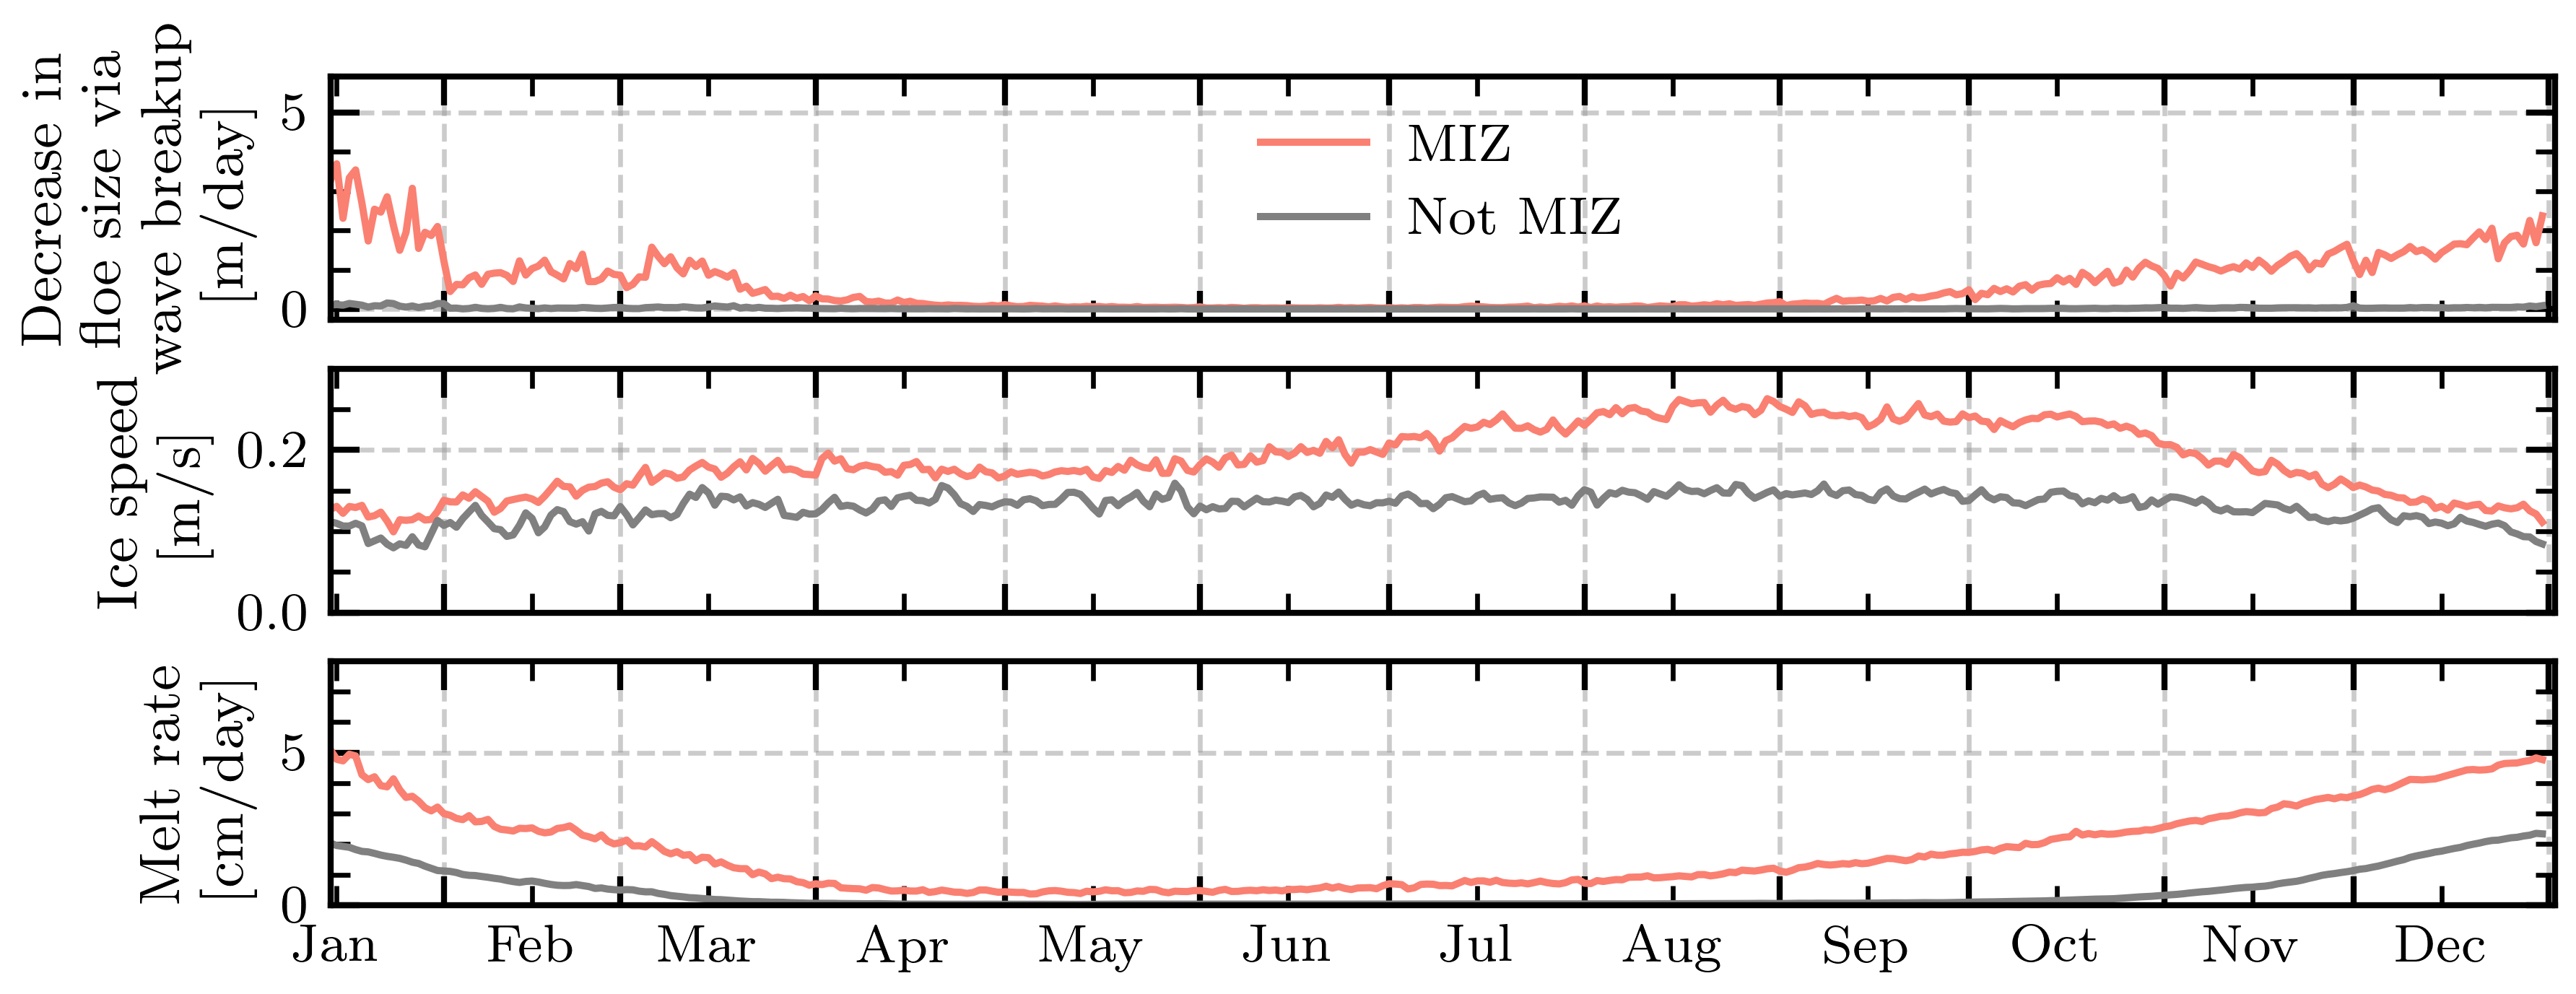

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(width,height/2), sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Wave breakup ------------------------------------------------------
sns.lineplot(ax=ax1, x=df_MIZ["month-day"], y=-df_MIZ["dafsd_wave"],
             errorbar=None, legend=False, label = "MIZ", color = COLOR_MIZ
              )
sns.lineplot(ax=ax1, x=df_interior["month-day"], y=-df_interior["dafsd_wave"],
             errorbar=None, legend=False, label = "interior", color = 'gray'
              )
ax1.set_ylabel('Decrease in\n floe size via\n wave breakup\n [m/day]',)
ax1.legend(['MIZ', 'Not MIZ'],fancybox=False, edgecolor=None, loc='upper center', labelcolor='black', framealpha=0.0)
print('ax1 done!')

# Ice speed ------------------------------------------------------
sns.lineplot(ax=ax2, x=df_MIZ["month-day"], y=df_MIZ["vel"],
             errorbar=None, legend=False, label = "MIZ", color = COLOR_MIZ
              )
sns.lineplot(ax=ax2, x=df_interior["month-day"], y=df_interior["vel"],
             errorbar=None, legend=False, label = "interior", color = 'gray'
              )
ax2.set_ylabel('Ice speed\n [m/s]',)
ax2.set_ylim((0,0.3))
print('ax2 done!')

# Total melt ------------------------------------------------------
sns.lineplot(ax=ax3, x=df_MIZ["month-day"], y=df_MIZ["meltb"]+df_MIZ["meltl"]+df_MIZ["meltt"],
             errorbar=None, legend=False, label = "MIZ", color = COLOR_MIZ
              )
sns.lineplot(ax=ax3, x=df_interior["month-day"], y=df_interior["meltb"]+df_interior["meltl"]+df_interior["meltt"],
             errorbar=None, legend=False, label = "interior", color = 'gray'
              )
ax3.set_ylabel('Melt rate\n [cm/day]',)
ax3.set_xlabel('')
ax3.set_xlim((np.round(ax3.get_xlim()[0]+31),np.round(ax3.get_xlim()[-1]-16)))
#set_ax_date(ax3, plot_type="clim")
month_year_formatter = mdates.DateFormatter('%b') 
monthly_locator = mdates.MonthLocator()
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax3.set_ylim((0,8))
print('ax3 done!')

# trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
# ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans,
#                fontsize='large', verticalalignment='top', fontfamily='serif',
#                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax2.text(0.0, 1.0, 'b)', transform=ax2.transAxes + trans,
#                fontsize='large', verticalalignment='top', fontfamily='serif',
#                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# ax3.text(0.0, 1.0, 'c)', transform=ax3.transAxes + trans,
#                fontsize='large', verticalalignment='top', fontfamily='serif',
#                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
# # from matplotlib.lines import Line2D
# handles, labels = ax3.get_legend_handles_labels()
# line1 = Line2D([0], [0], label='MIZ', color= COLOR_MIZ)
# line2 = Line2D([0], [0], label='not MIZ', color='gray')

# handles.extend([line1, line2])
# plt.legend(handles=handles, ncol=2, fancybox=False, edgecolor="black", loc="upper right", 
#            bbox_to_anchor=(0.5, 1.15), 
#            bbox_transform=fig.transFigure, labelcolor='black', framealpha=1.0)

             
# plt.legend(handles=legend_elements, ncol=1, fancybox=False, edgecolor="black", loc="upper right", 
#            #bbox_to_anchor=(0.5, 1.05), 
#            bbox_transform=fig.transFigure, labelcolor='black', framealpha=1.0)

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'MIZ_interior_dynamics_seasonal_black.png', dpi = 1000, bbox_inches="tight", transparent=True)
plt.savefig(savepath+'MIZ_interior_dynamics_seasonal.pdf')

In [17]:
plt.savefig(savepath+'MIZ_interior_dynamics_seasonal.pdf')

<Figure size 1980x1500 with 0 Axes>

## Bar chart summer vs winter dynamics

In [3]:
dates = pd.to_datetime(df_MIZ['date'].values, format='%Y-%m-%d')
df_MIZ['month-day'] = dates.strftime('%m-%d')
df_MIZ.drop(df_MIZ[df_MIZ['month-day'] == '02-29'].index, inplace = True)
df_MIZ['month-day'] = pd.to_datetime(df_MIZ['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df_MIZ['date'].values, format='%Y-%m-%d')
df_MIZ['year'] = dates.strftime('%Y')
df_MIZ['year'] = pd.to_datetime(df_MIZ['year'].values, format='%Y')
#df_miz_ts.groupby(['date']).mean().shape

NameError: name 'df_MIZ' is not defined

In [26]:
df_MIZ.head(3)
idx_summer1 = df_MIZ['month-day'] < pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_summer2 = df_MIZ['month-day'] > pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_summer = np.logical_or(idx_summer1, idx_summer2)
df_MIZ_summer = df_MIZ.iloc[idx_summer.values,:]

idx_winter1 = df_MIZ['month-day'] >= pd.to_datetime('1900-04-01', format="%Y-%m-%d")
idx_winter2 = df_MIZ['month-day'] <= pd.to_datetime('1900-09-30', format="%Y-%m-%d")
idx_winter = np.logical_or(idx_winter1, idx_winter2)
df_MIZ_winter = df_MIZ.iloc[idx_winter.values,:]

/jobfs/93784012.gadi-pbs/ipykernel_1598132/605435722.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([-df_MIZ_summer['dafsd_wave'], -df_MIZ_winter['dafsd_wave']])
/jobfs/93784012.gadi-pbs/ipykernel_1598132/605435722.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray([df_MIZ_summer['vel'], df_MIZ_winter['vel']])
/jobfs/93784012.gadi-pbs/ipykernel_1598132/605435722.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

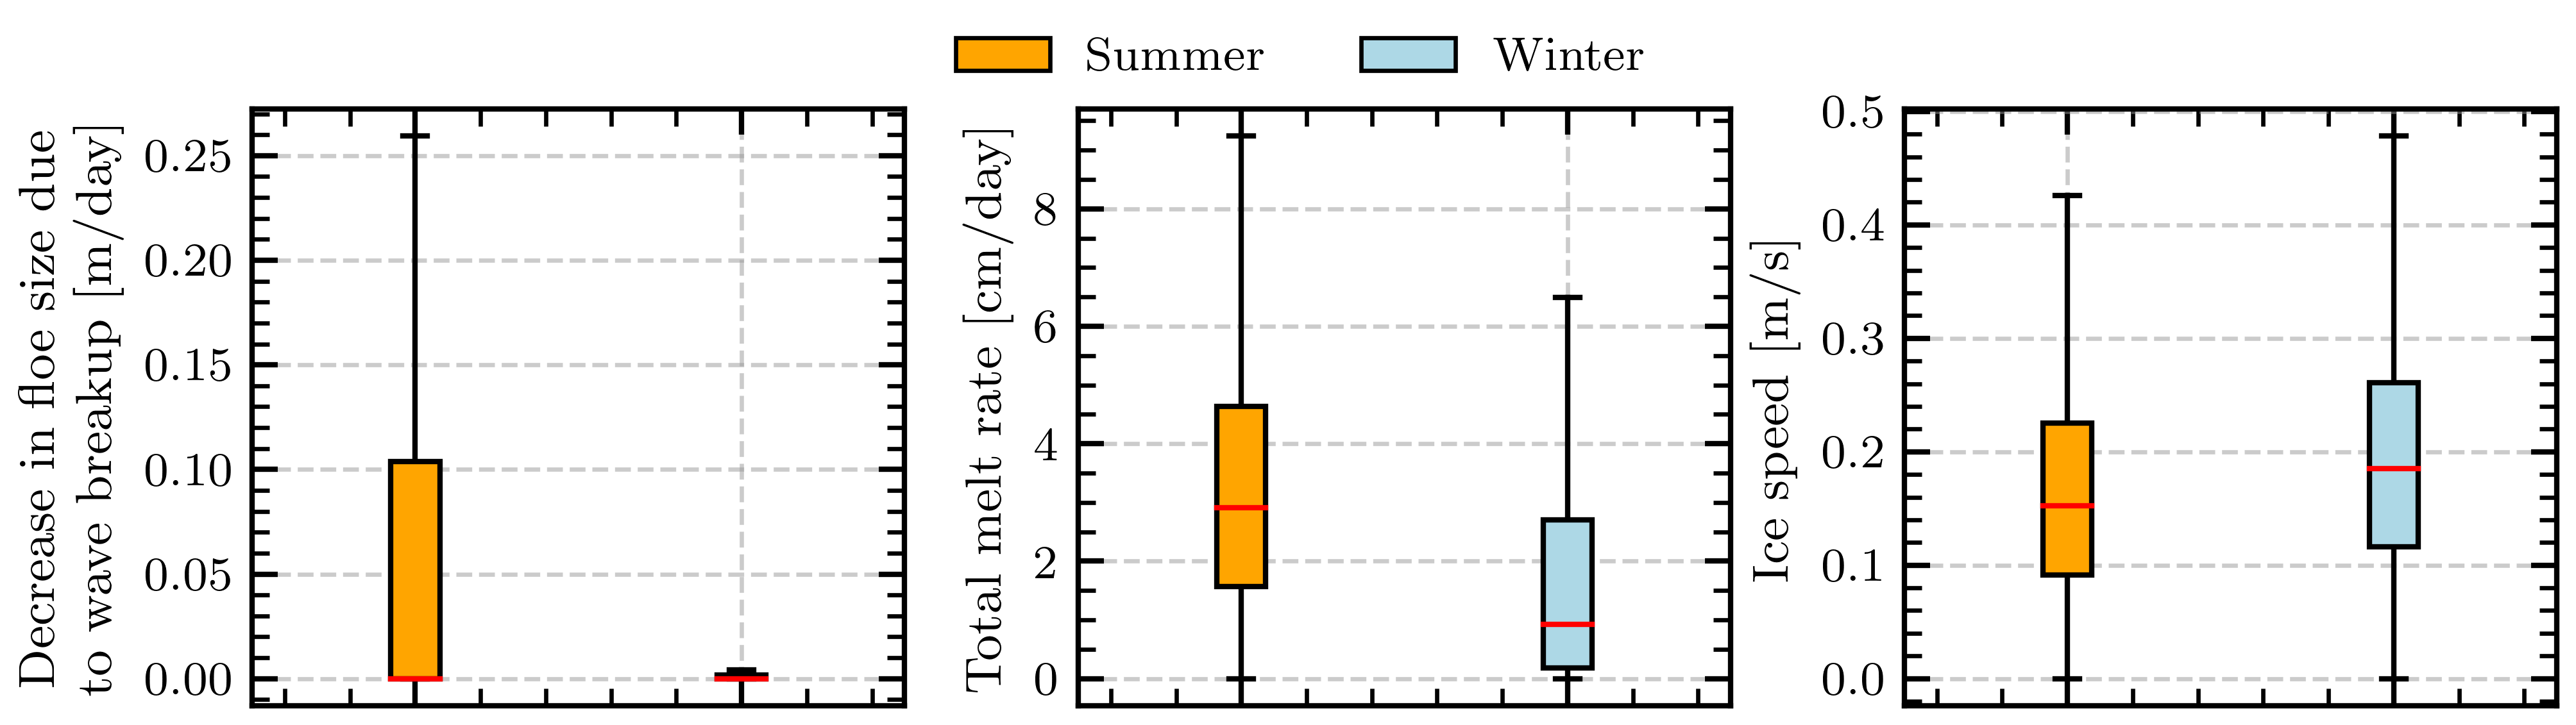

In [37]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib_scalebar.scalebar import ScaleBar
import textwrap

fig, axes = plt.subplots(1, 3, figsize=(width,height/3), sharex=False)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

seasons = ['Summer', 'Winter']


data = np.asarray([-df_MIZ_summer['dafsd_wave'], -df_MIZ_winter['dafsd_wave']])
bplot1 = ax1.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
#ax1.set_ylim((-0.2,0.05))
ax1.set_ylabel(textwrap.fill("Decrease in floe size due to wave breakup [m/day]", 26) )
ax1.set_xticklabels([])
#ax1.axhspan(0.15, 0.8, color='gray', alpha=0.3, linestyle ='-')


font = {'family':'serif','size':6}
#scalebar = ScaleBar(0.3, rotation="vertical", sep = 1, location="lower left", height_fraction=0.002, font_properties = font,
#                    scale_formatter=lambda value, unit: f"", label = "15-", label_loc="right", box_alpha=0.0, border_pad=0.5)
#ax1.add_artist(scalebar)



data = np.asarray([df_MIZ_summer['vel'], df_MIZ_winter['vel']])
bplot2 = ax3.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
#ax2.set_ylim((-0.001,0.0051))
ax3.set_ylabel("Ice speed [m/s]")
ax3.set_xticklabels([])

data = np.asarray([df_MIZ_summer['meltt']+df_MIZ_summer['meltb']+df_MIZ_summer['meltl'], 
                   df_MIZ_winter['meltt']+df_MIZ_winter['meltl']+df_MIZ_winter['meltb']])
bplot3 = ax2.boxplot(data, patch_artist=True,  # fill with color
                     showfliers=False)
#ax3.set_ylim((-0.005,0.03))
ax2.set_ylabel("Total melt rate [cm/day]")
ax2.set_xticklabels([])

# fill with colors
colors = ['orange', 'lightblue']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# ax2.legend(['Summer','Winter'], fancybox=False, edgecolor="black")
# sns.move_legend(ax2, "upper center", bbox_to_anchor=(.5, 1.26), ncol=2, title=None, frameon=True, 
#                 fancybox=False, edgecolor='black', framealpha=0.0)
fig.tight_layout(pad=0.25) 

handles, labels = ax1.get_legend_handles_labels()
line1 = Line2D([0], [0], label='Summmer', color='orange')
line2 = Line2D([0], [0], label='Winter', color='lightblue')
                                                       

# add manual symbols to auto legend
#handles.extend([line1, line2])
plt.legend(handles=handles, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.15), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)


legend_elements = [Patch(facecolor='orange', edgecolor='black',
                         label='Summer'),
                   Patch(facecolor='lightblue', edgecolor='black',
                         label='Winter'),
                  ]
plt.legend(handles=legend_elements, ncol=2, fancybox=False, edgecolor="black", loc="center", 
           bbox_to_anchor=(0.5, 1.05), bbox_transform=fig.transFigure, labelcolor='black', framealpha=0.0)

#ax.legend(handles=legend_elements, loc='center')

#

savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'dynamics_summer_winter_boxplot.png', dpi = 1000, bbox_inches="tight", transparent=True)
plt.show()

In [28]:
df_MIZ_summer.describe()

Unnamed: 0.1    Unnamed: 0     dafsd_latm     dafsd_latg  \
count  9.689240e+05  9.689240e+05  968924.000000  968924.000000   
mean   1.279964e+06  4.181290e+06      -0.014959       0.000031   
min    5.310000e+02  4.398000e+03      -1.801590       0.000000   
25%    1.153738e+05  9.734448e+05      -0.003550       0.000000   
50%    1.759342e+06  5.631840e+06      -0.001189       0.000000   
75%    2.008926e+06  6.337177e+06      -0.000381       0.000013   
max    2.238858e+06  6.905421e+06       0.000000       0.002253   
std    8.846631e+05  2.648065e+06       0.078042       0.000094   

          dafsd_weld     dafsd_newi     dafsd_wave        pancake  \
count  968924.000000  968924.000000  968924.000000  968924.000000   
mean        0.098334       0.246897      -1.473964       0.450505   
min         0.000000       0.000000    -281.484782       0.000000   
25%         0.000000       0.000000      -0.103723       0.235478   
50%         0.000000       0.000000       0.000000       0.394463   
75%         0.000605       0.008446       0.000000       0.551526   
max       217.890760     242.250931       0.000002       4.524547   
std         1.406991       3.099694       5.309856       0.329870   

           longitude       latitude                           date         k  \
count  968924.000000  968924.000000                         968924  968924.0   
mean      187.821334     -65.460064  2015-04-02 11:01:48.952198400       0.0   
min         0.500000     -77.629898            2010-01-01 00:00:00       0.0   
25%       106.500000     -69.173546            2012-11-22 00:00:00       0.0   
50%       198.500000     -65.031616            2015-03-12 00:00:00       0.0   
75%       262.500000     -61.953148            2017-11-10 00:00:00       0.0   
max       359.500000     -53.038300            2019-12-31 00:00:00       0.0   
std        97.281898       4.742169                            NaN       0.0   

                 vel          meltl         meltt          meltb  \
count  968924.000000  968924.000000  9.689240e+05  968924.000000   
mean        0.163701       1.172280  6.018794e-02       2.509533   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         0.091507       0.068245  1.857370e-33       1.302430   
50%         0.152596       0.246089  1.854903e-20       2.363844   
75%         0.225142       0.723838  1.972907e-18       3.550830   
max         0.709595     118.302680  1.701134e+01      16.352930   
std         0.094097       4.219776  3.295985e-01       1.515353   

                           month-day                           year  
count                         968924                         968924  
mean   1900-08-14 22:55:48.701033472  2014-08-19 07:54:08.249810944  
min              1900-01-01 00:00:00            2010-01-01 00:00:00  
25%              1900-03-08 00:00:00            2012-01-01 00:00:00  
50%              1900-10-30 00:00:00            2015-01-01 00:00:00  
75%              1900-12-04 00:00:00            2017-01-01 00:00:00  
max              1900-12-31 00:00:00            2019-01-01 00:00:00  
std                              NaN                            NaN